2  Rows Have Been Removed
the size of data are  999 rows and  16 columns.

Proposal we can get sample from table(100 rows) [Y/N]y
data_dte
Write The Capital Letter for Chosen Chart Type(Line)L


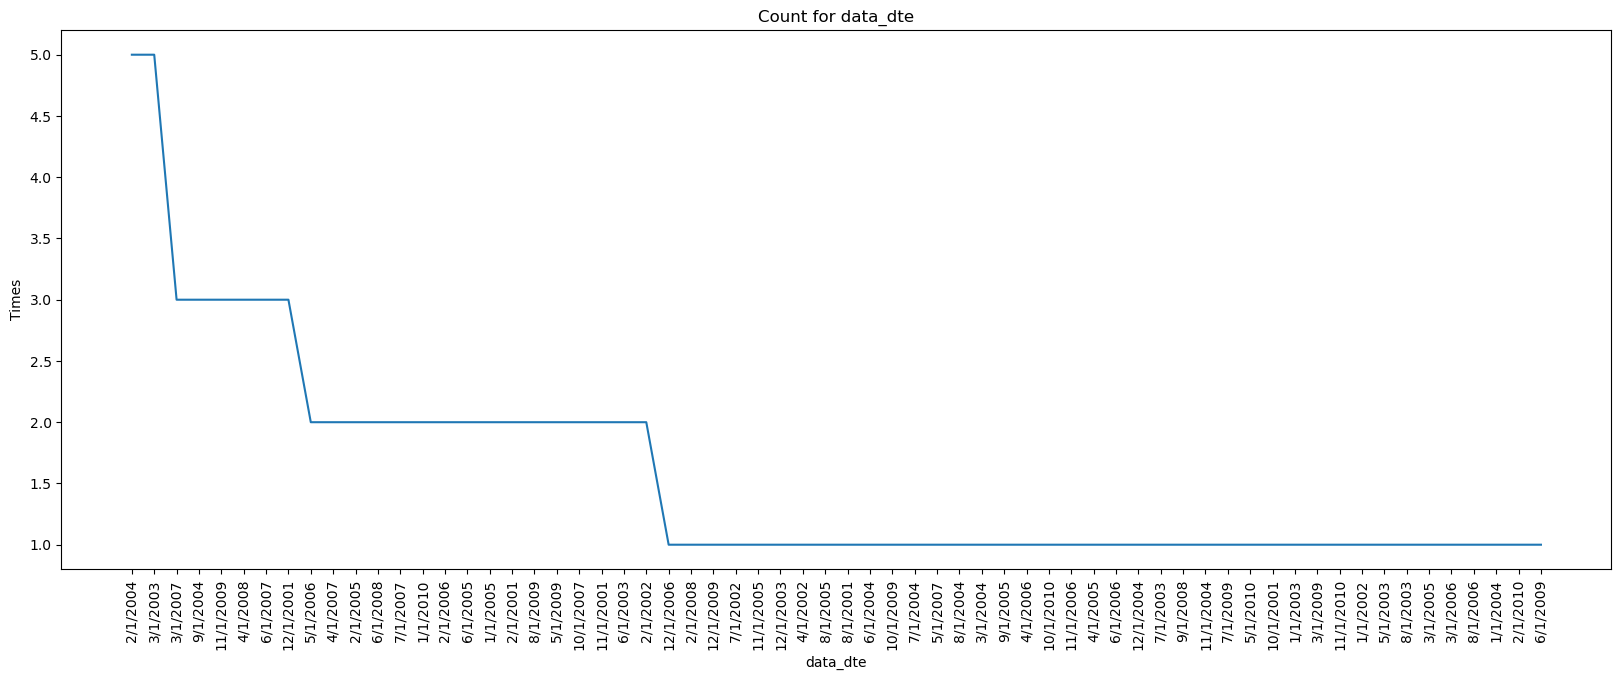

Year
Write The Capital Letter for Chosen Chart Type(Histogram, Scatter, Pie)h


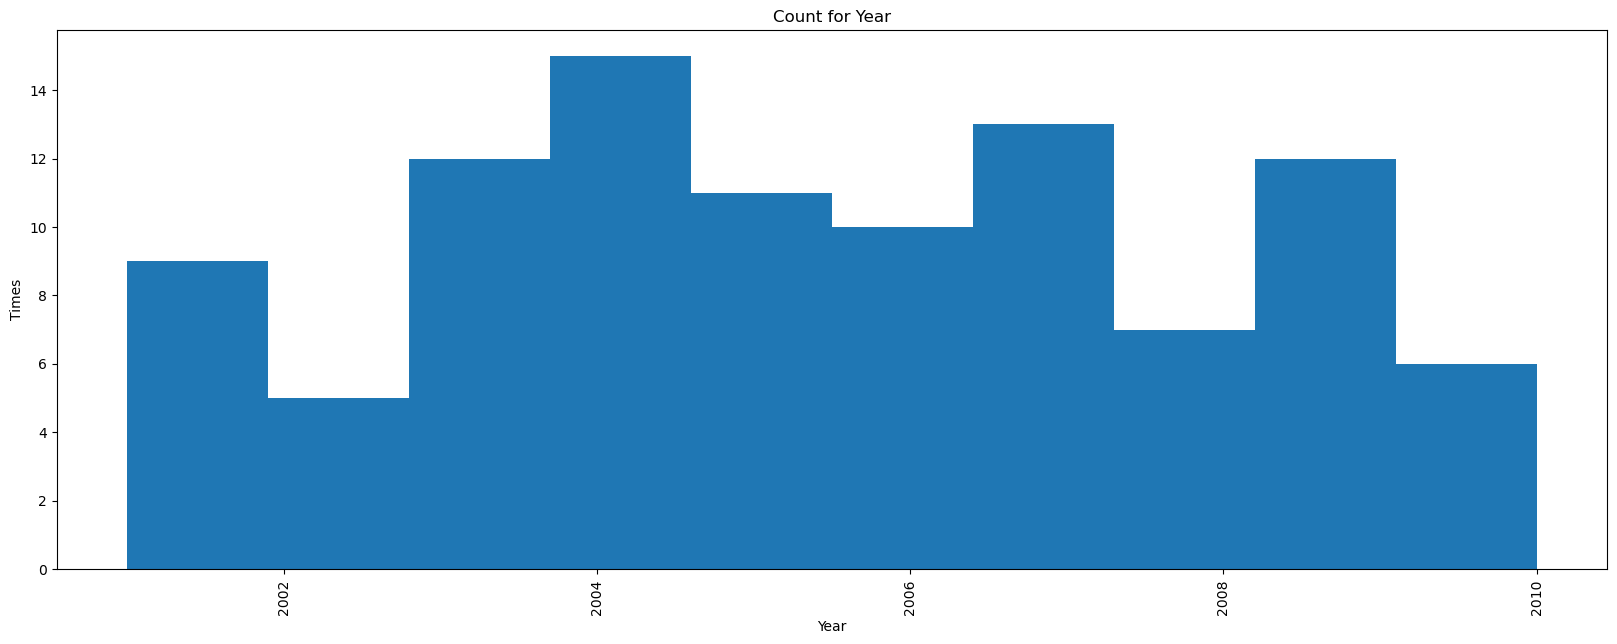

Month
Write The Capital Letter for Chosen Chart Type(Histogram, Scatter, Pie)h


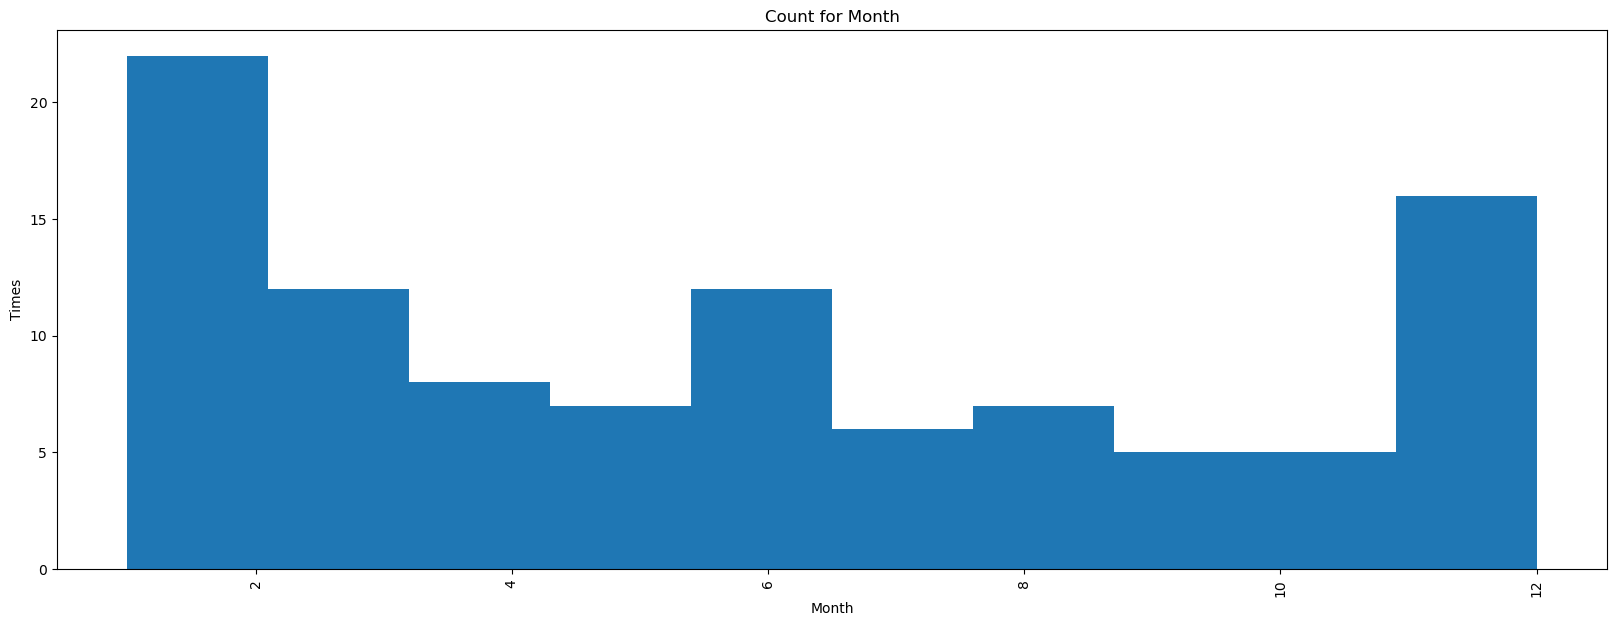

usg_apt_id
Write The Capital Letter for Chosen Chart Type(Histogram, Scatter, Pie)h


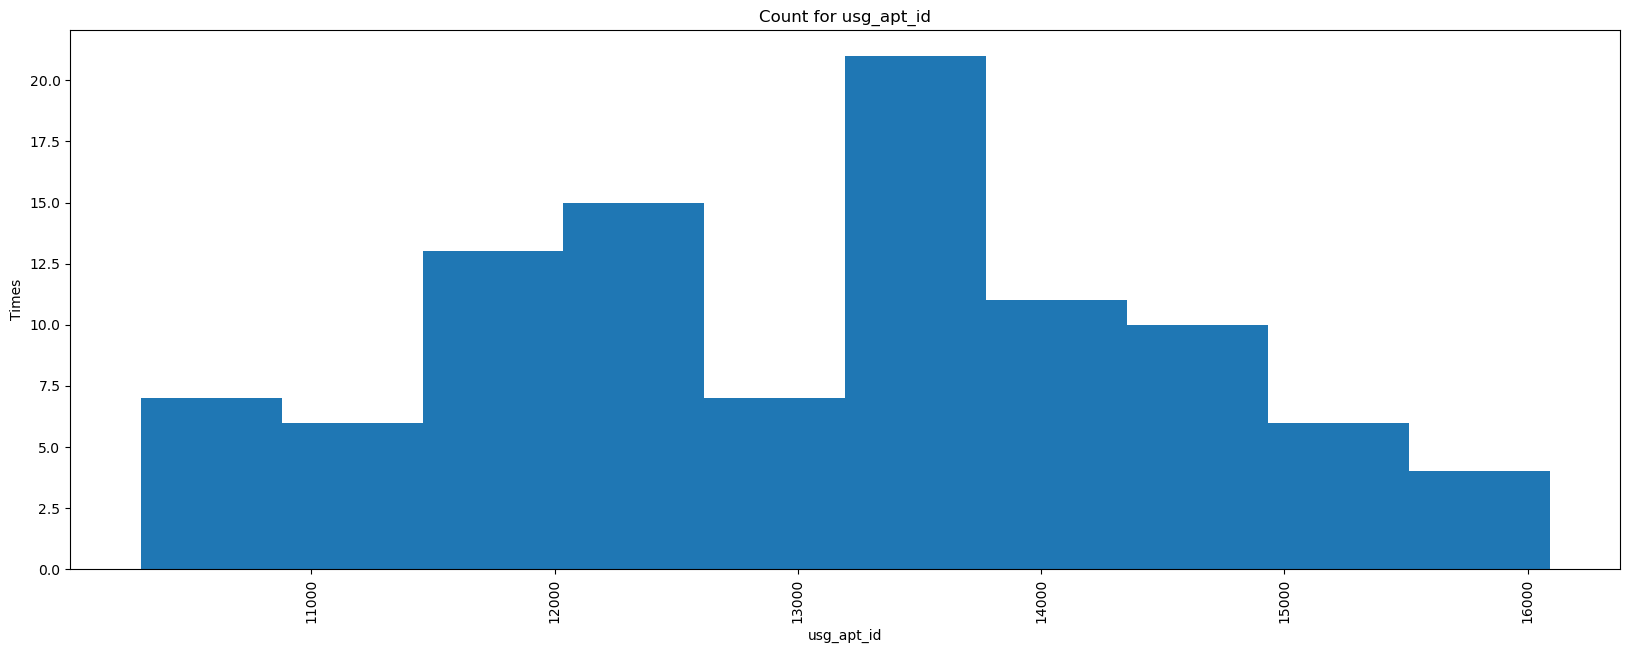

usg_apt
Write The Capital Letter for Chosen Chart Type(Line)L


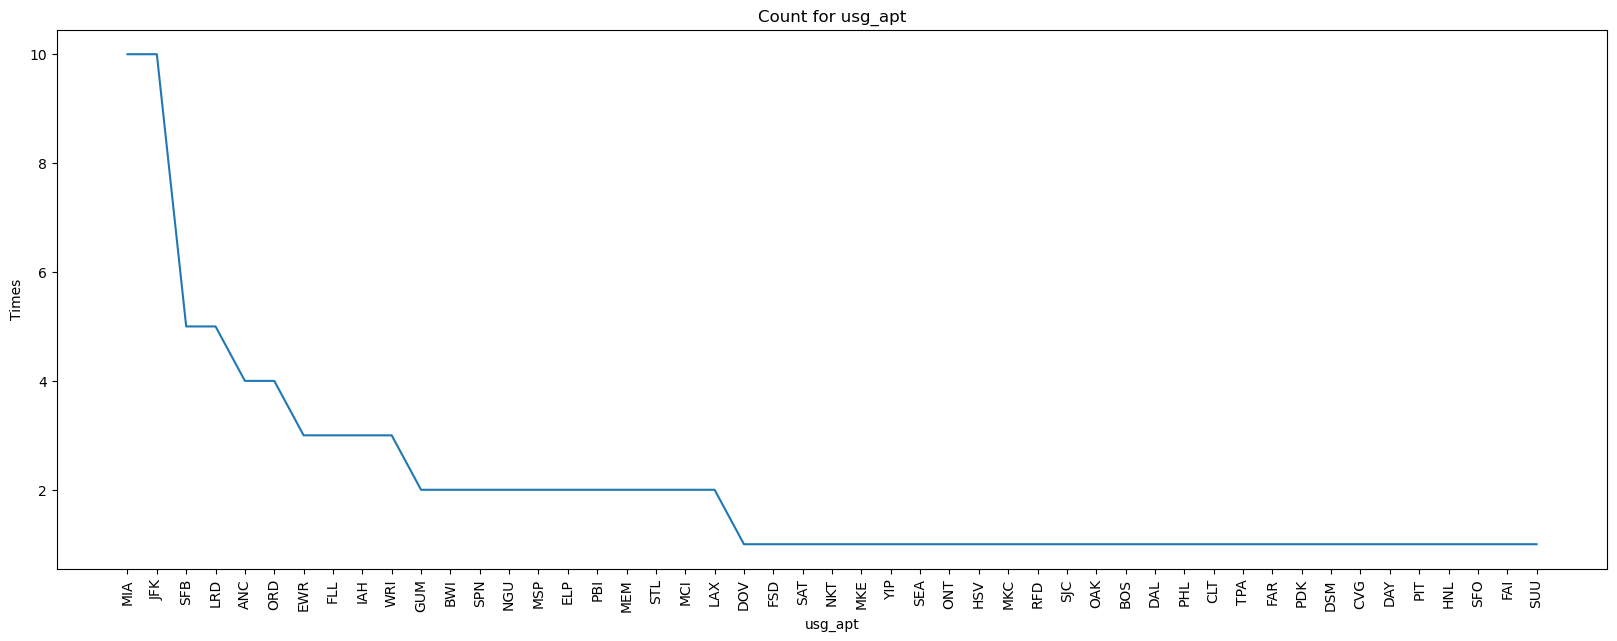

usg_wac
Write The Capital Letter for Chosen Chart Type(Histogram, Scatter, Pie)h


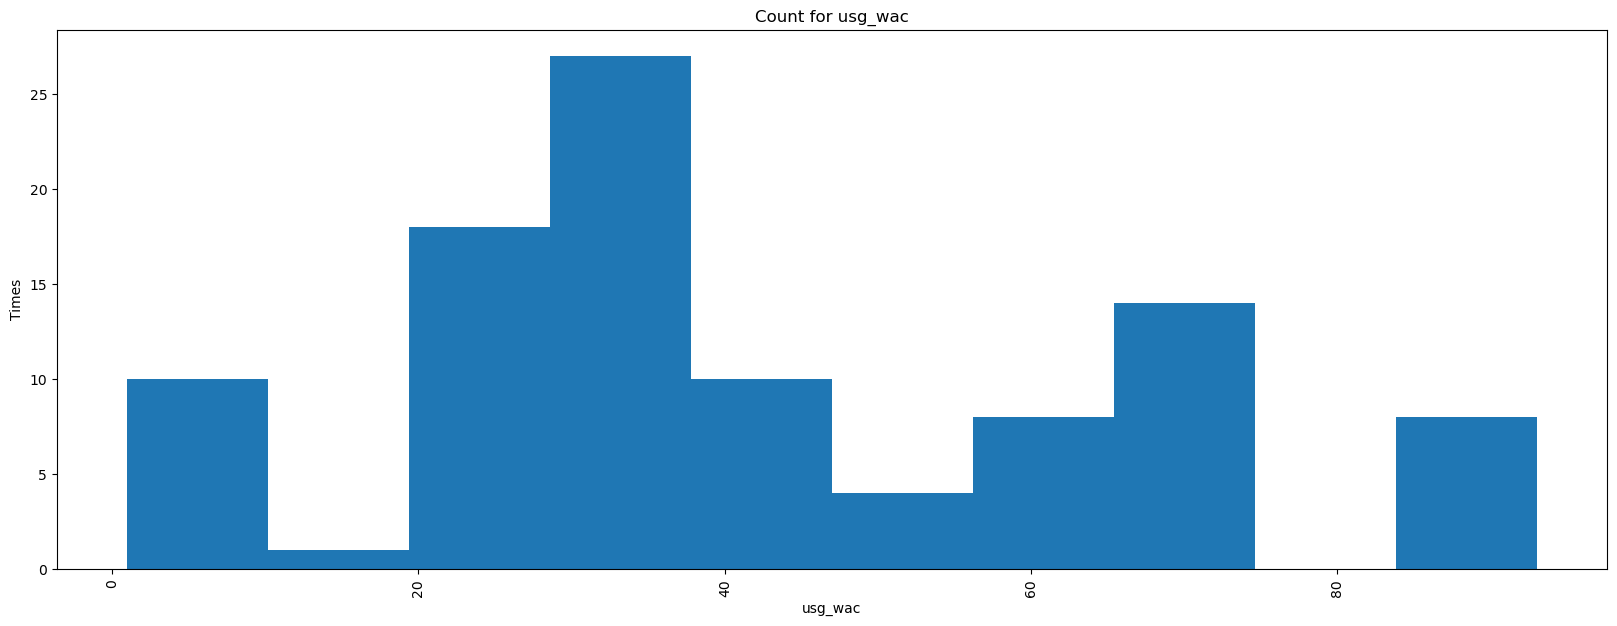

fg_apt_id
Write The Capital Letter for Chosen Chart Type(Histogram, Scatter, Pie)h


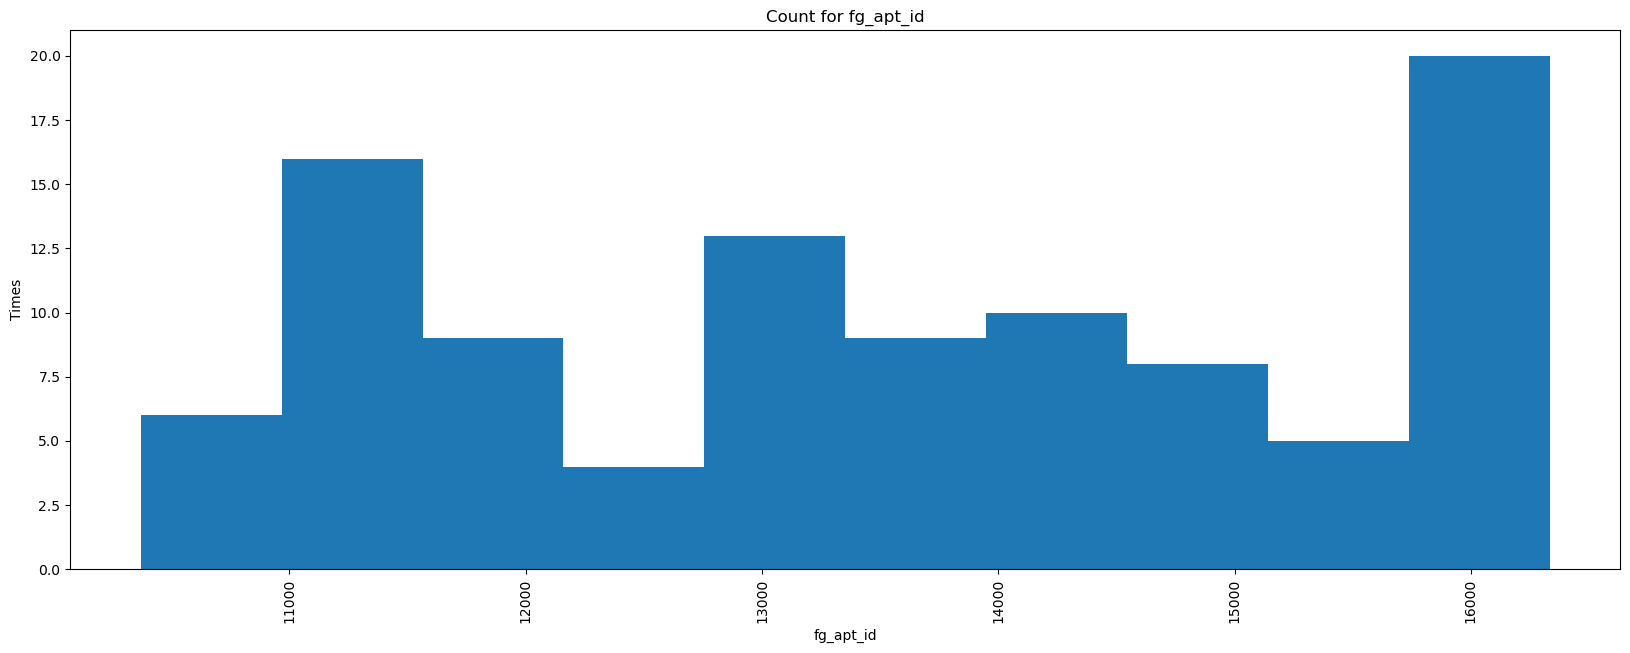

fg_apt
Write The Capital Letter for Chosen Chart Type(Line)L


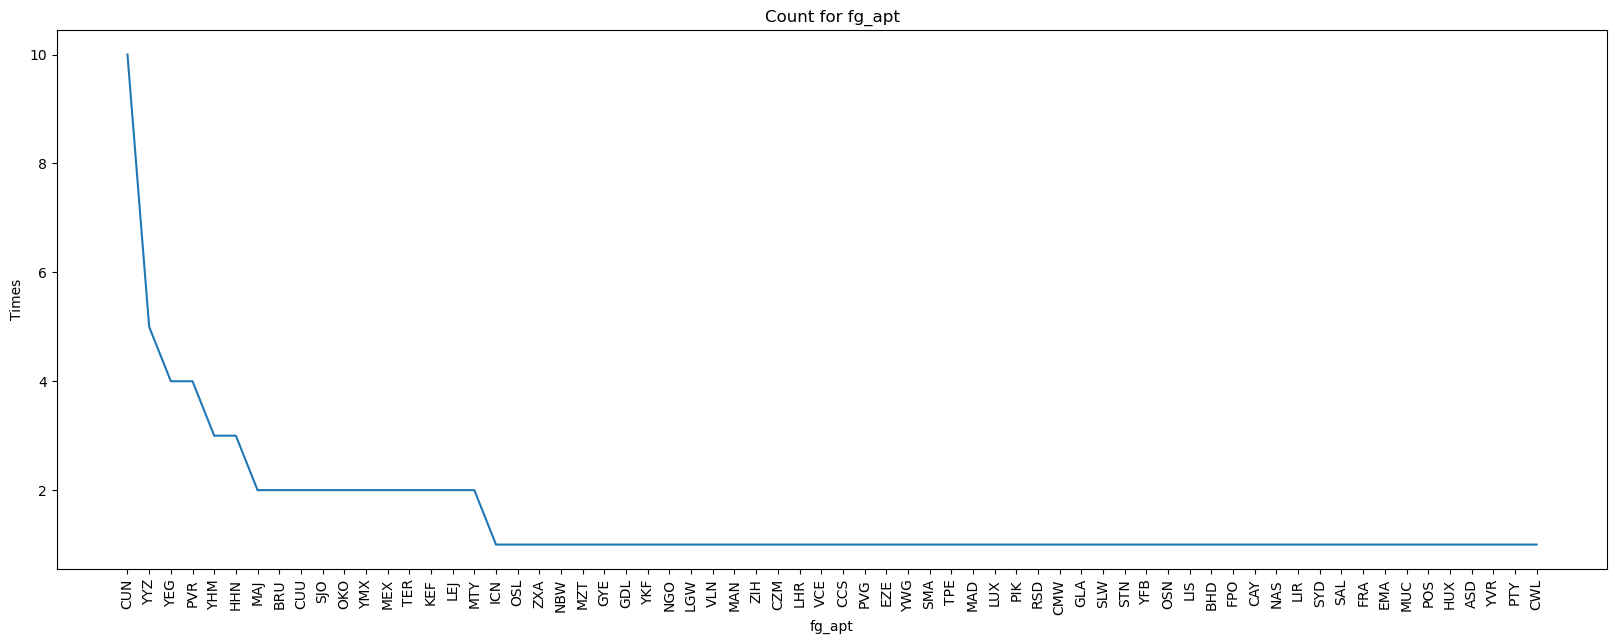

fg_wac
Write The Capital Letter for Chosen Chart Type(Histogram, Scatter, Pie)h


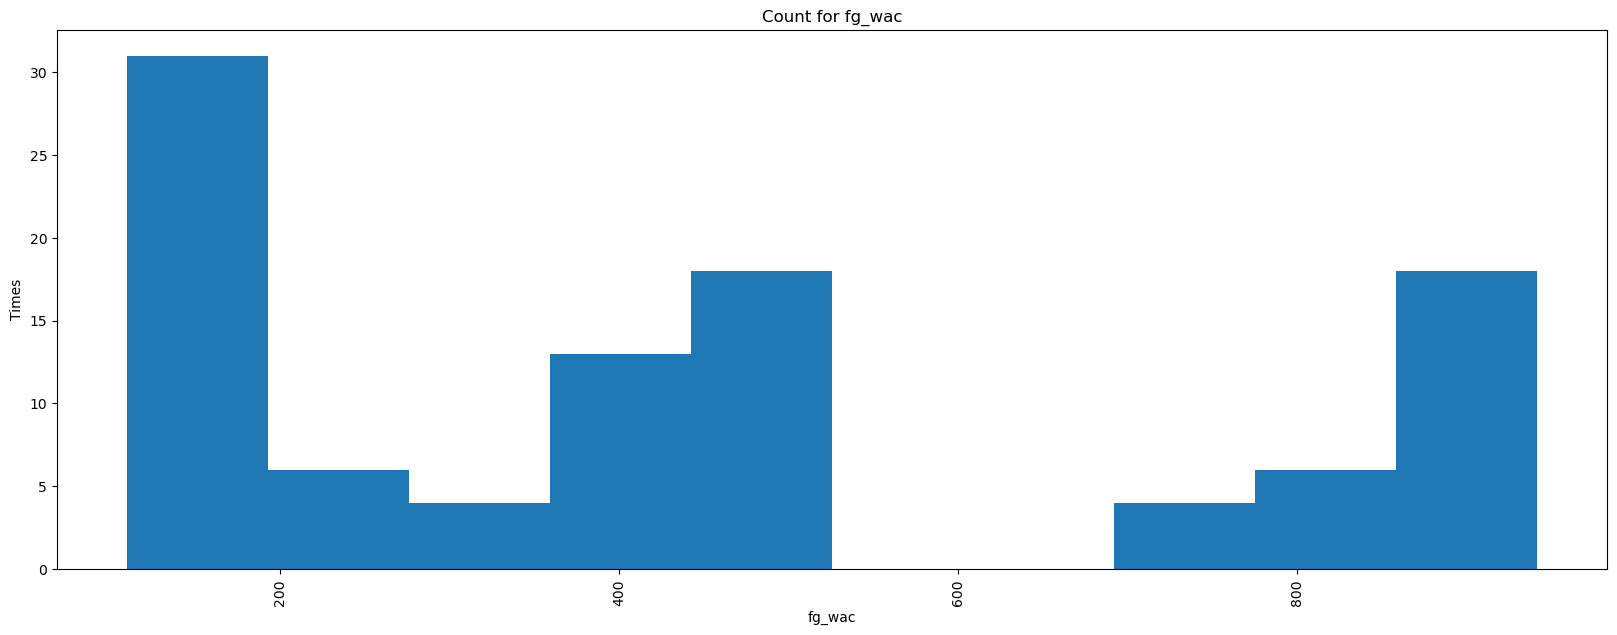

airlineid
Write The Capital Letter for Chosen Chart Type(Histogram, Scatter, Pie)h


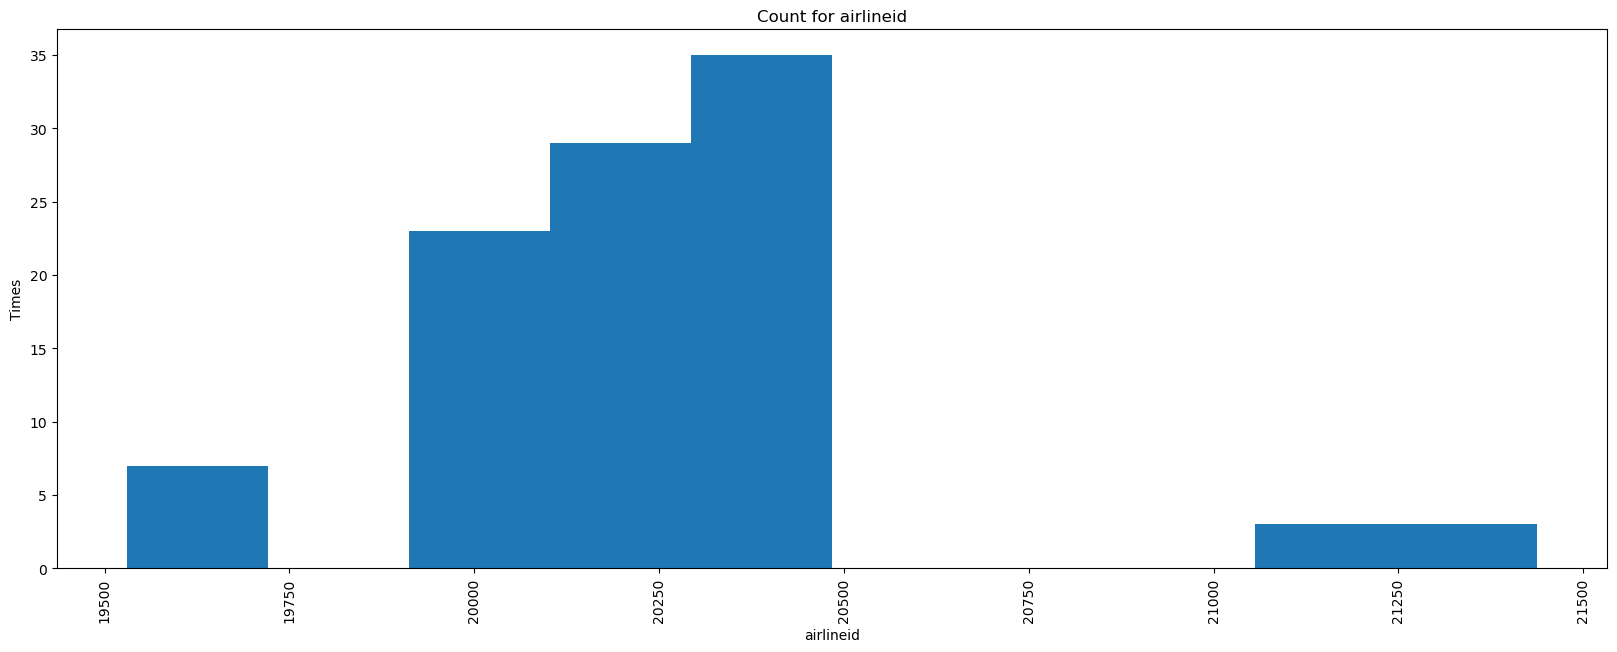

carrier
Write The Capital Letter for Chosen Chart Type(Line)L


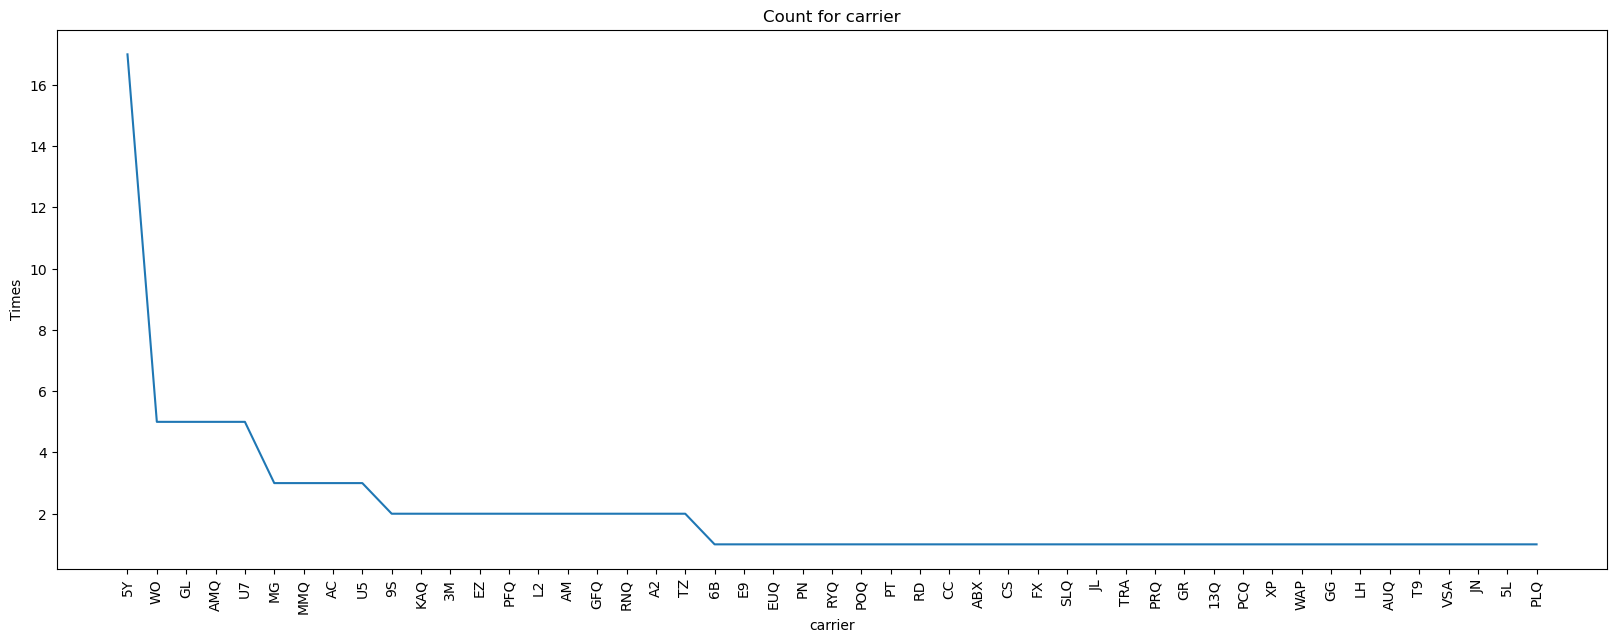

carriergroup
Write The Capital Letter for Chosen Chart Type(Line)L


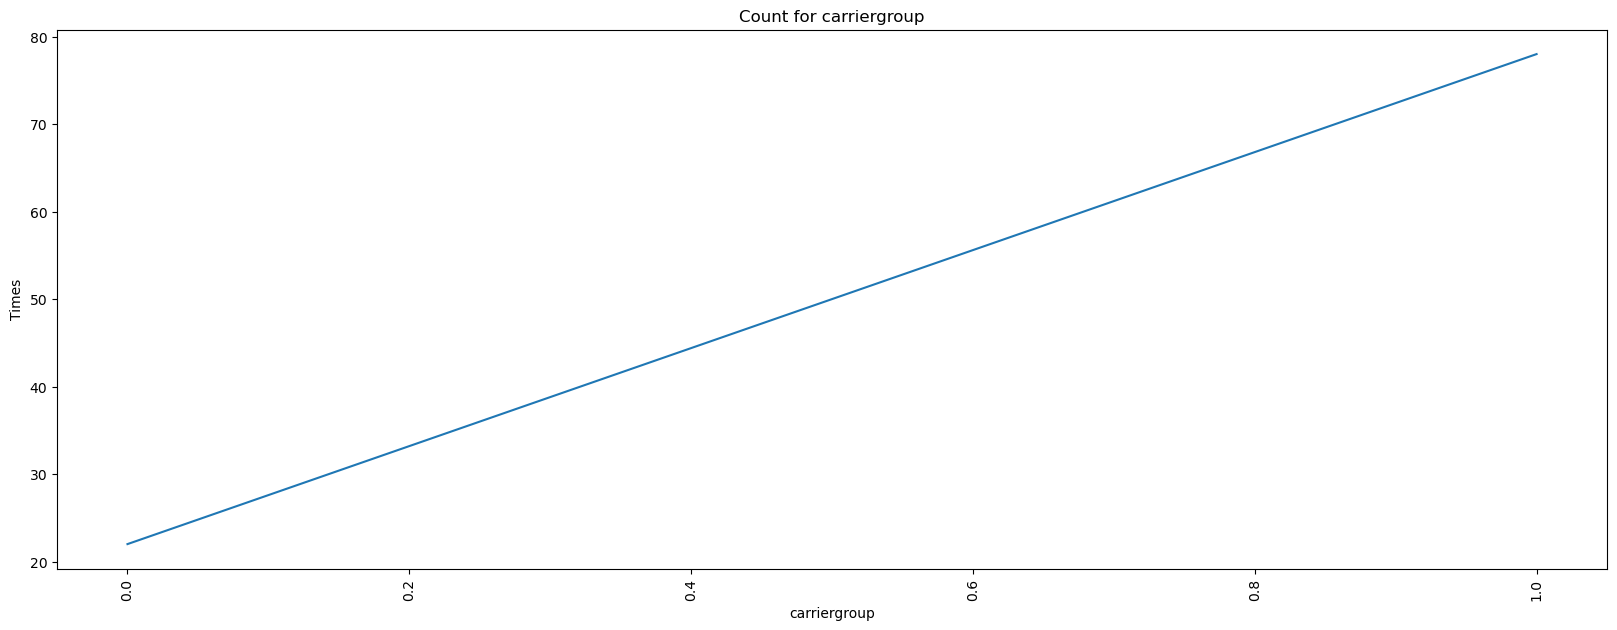

type
Write The Capital Letter for Chosen Chart Type(Line)L


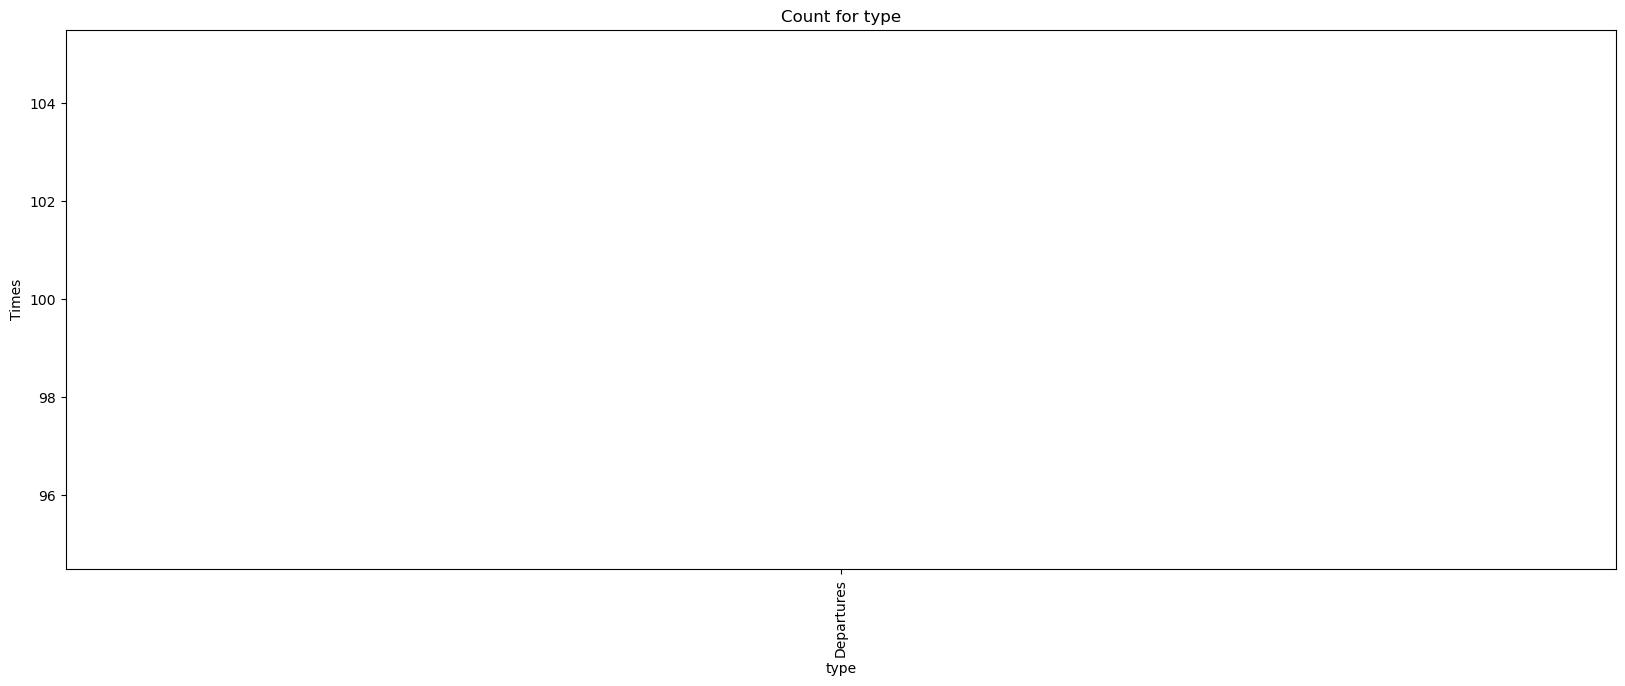

Scheduled
Write The Capital Letter for Chosen Chart Type(Line)L


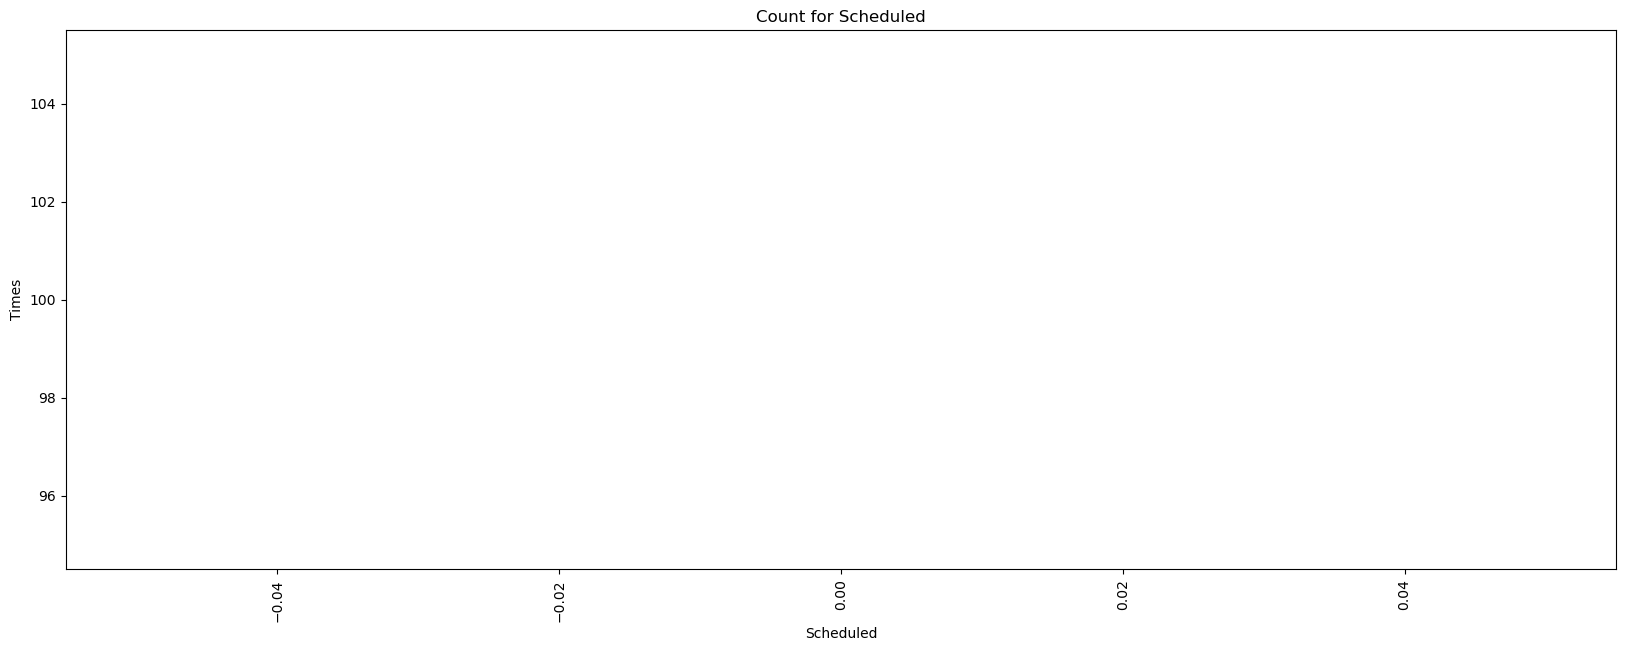

Charter
Write The Capital Letter for Chosen Chart Type(Histogram, Scatter, Pie)h


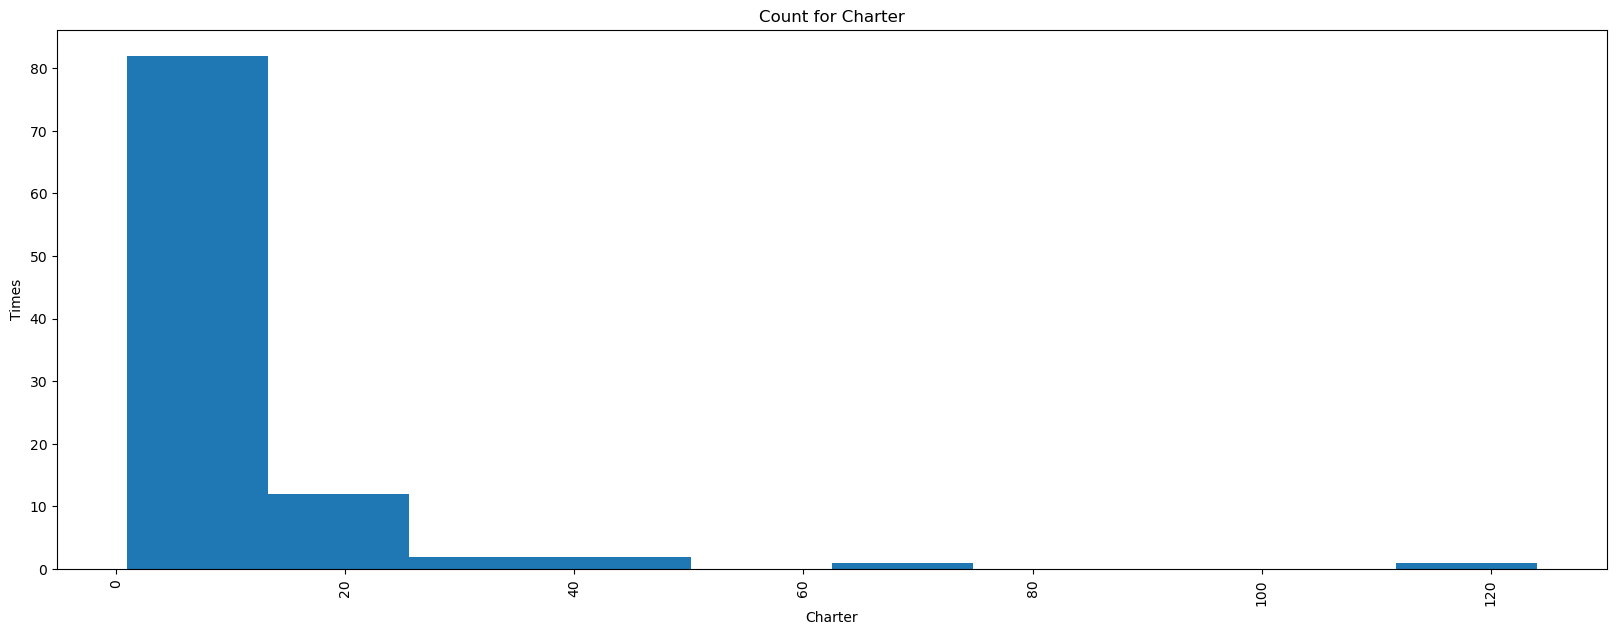

Total
Write The Capital Letter for Chosen Chart Type(Histogram, Scatter, Pie)h


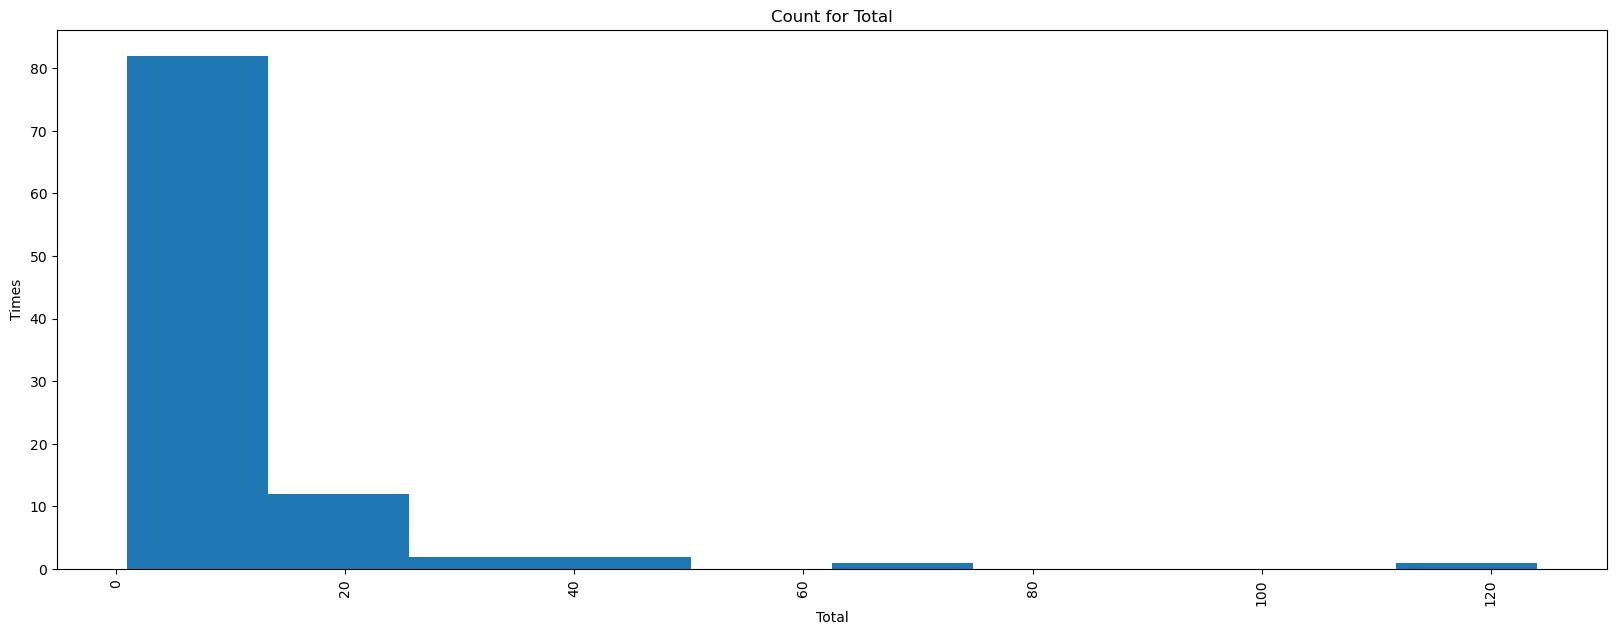

Do you want choose another data file (Y/N)? y
Good Bye
2  Rows Have Been Removed
the size of data are  999 rows and  16 columns.

Proposal we can get sample from table(100 rows) [Y/N]y
data_dte
Write The Capital Letter for Chosen Chart Type(Line)L


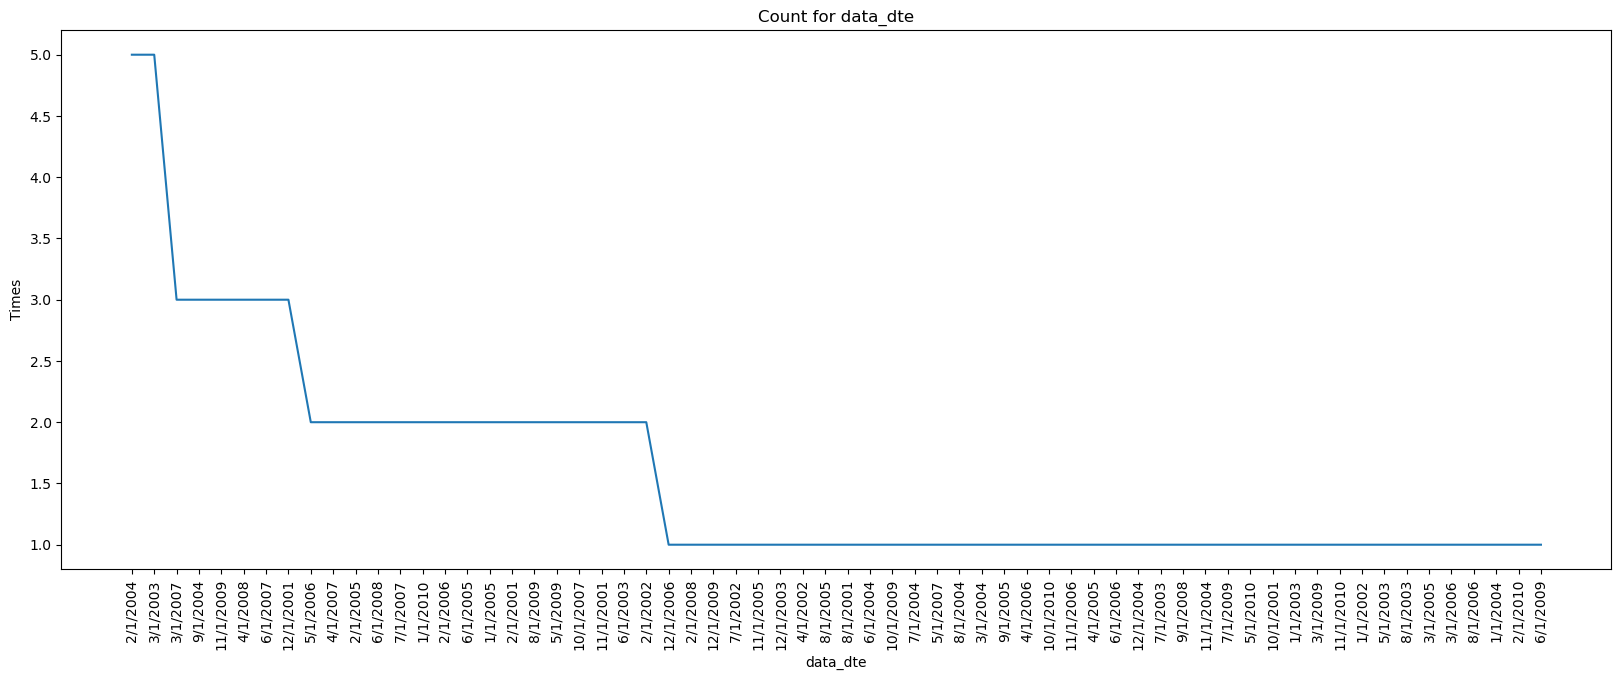

Year
Write The Capital Letter for Chosen Chart Type(Histogram, Scatter, Pie)p


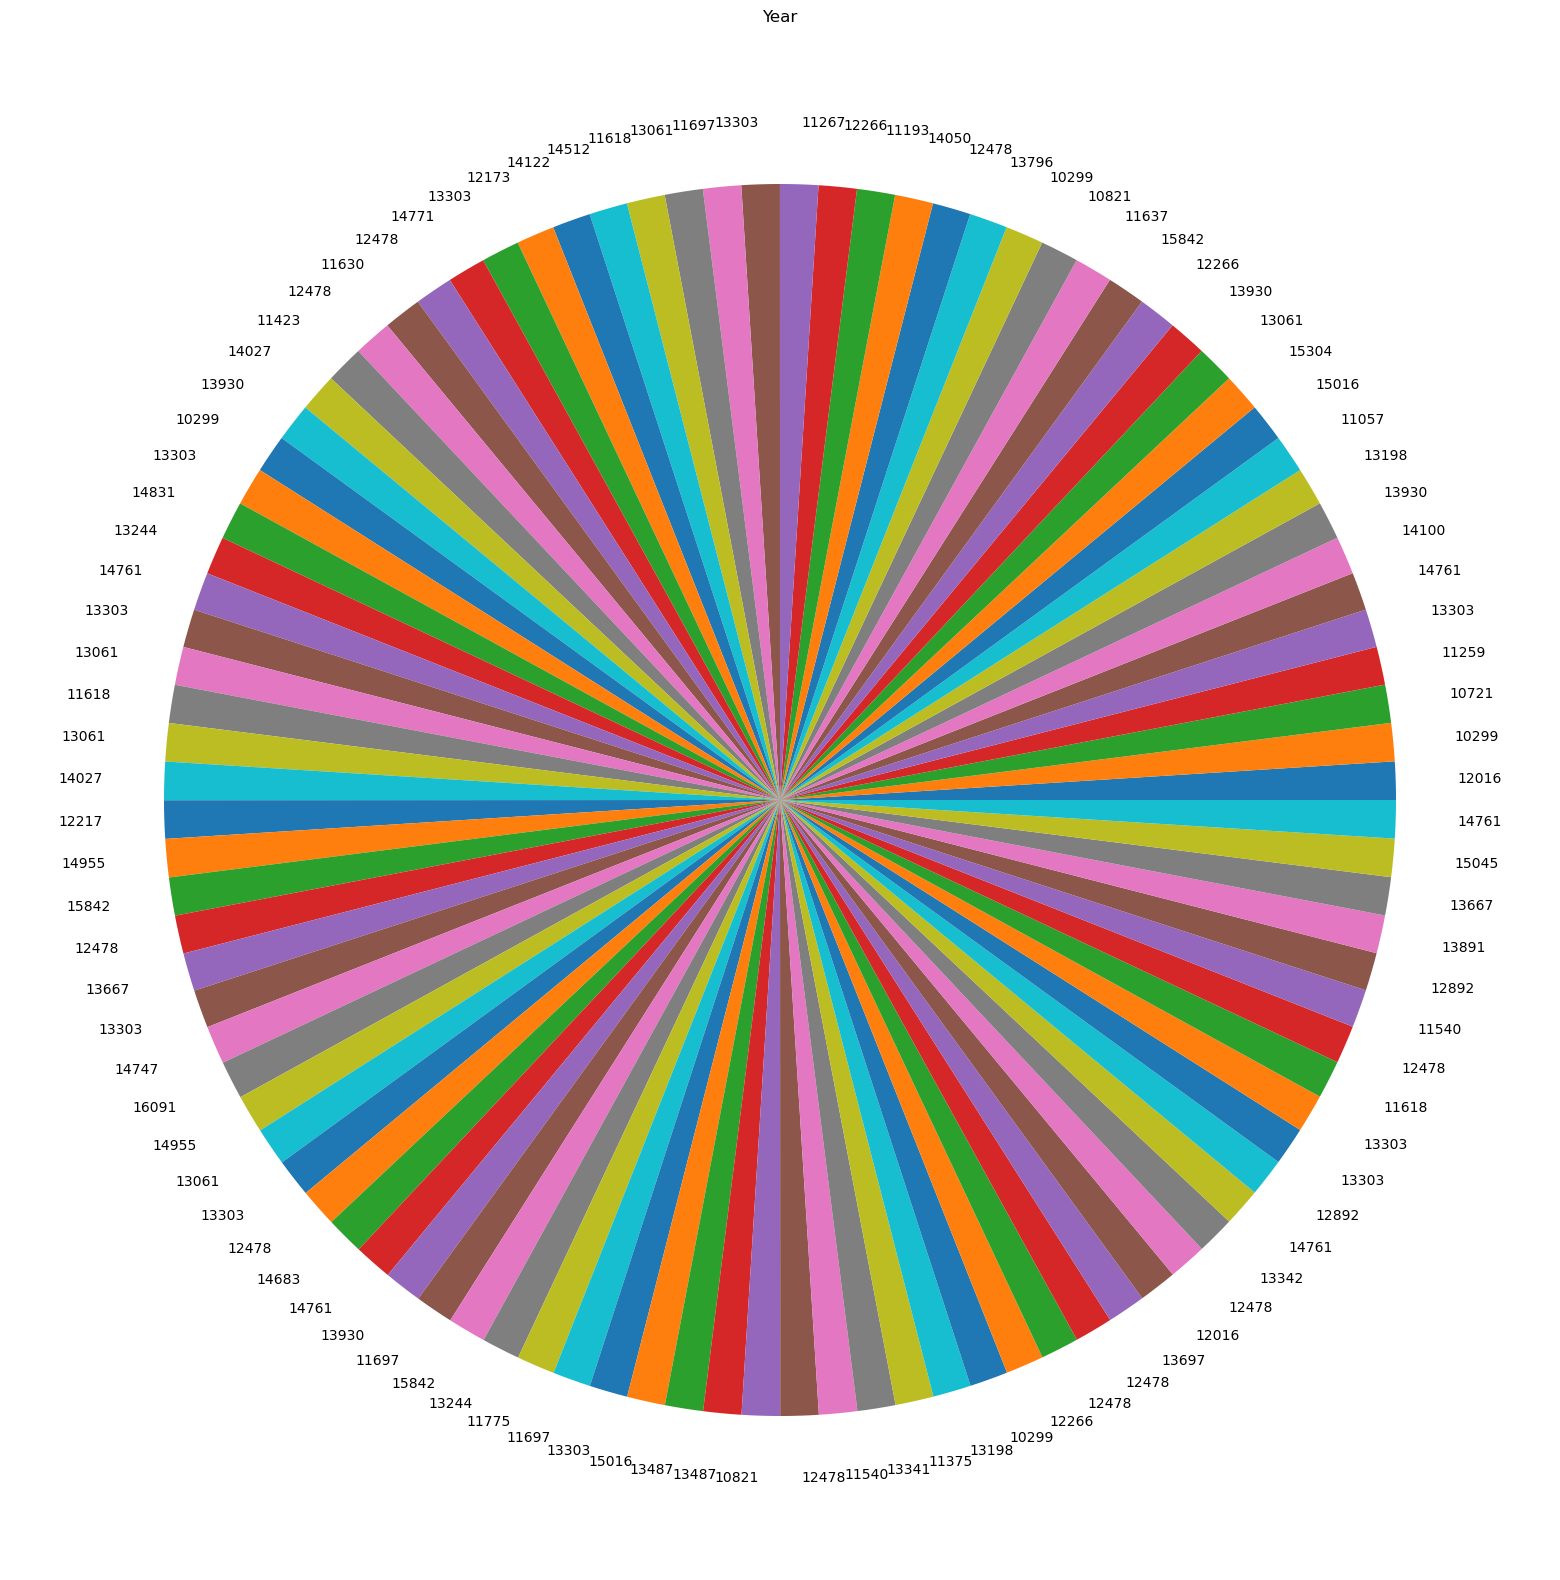

Month
Write The Capital Letter for Chosen Chart Type(Histogram, Scatter, Pie)h


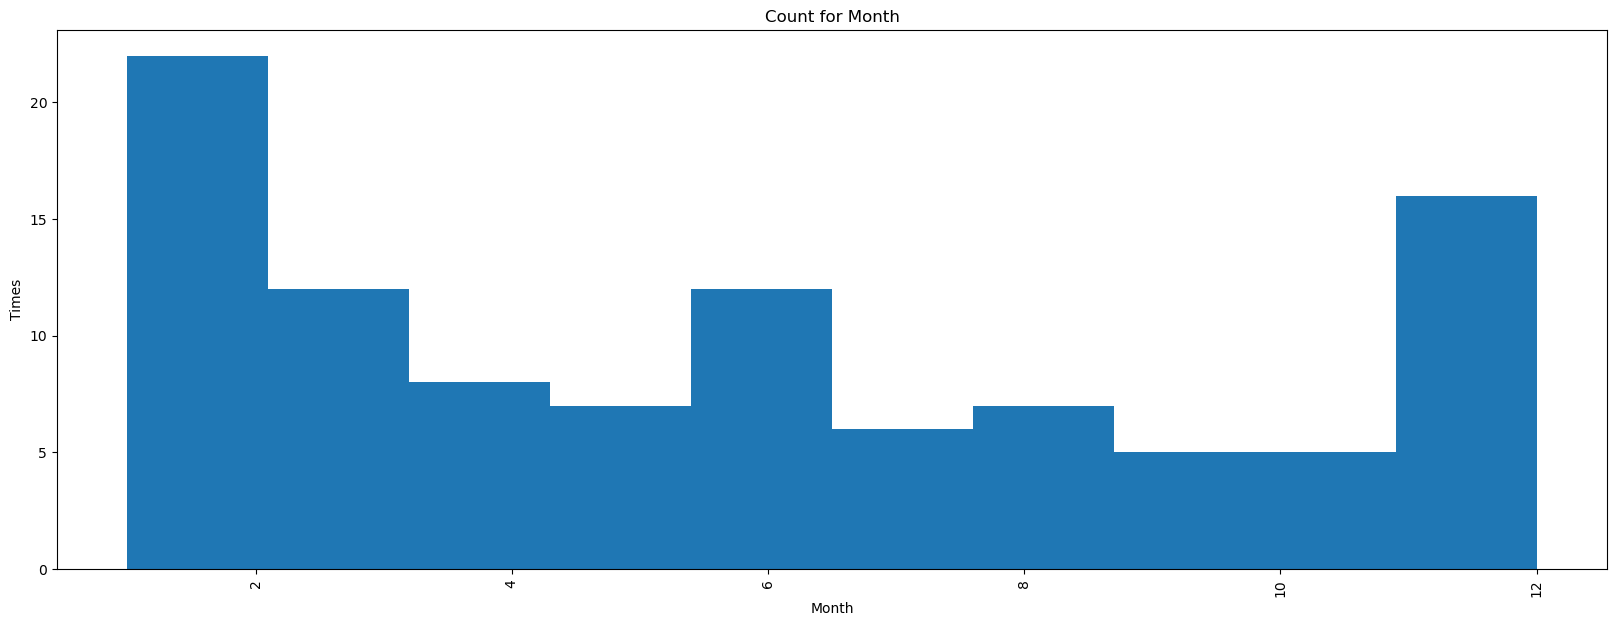

usg_apt_id
Write The Capital Letter for Chosen Chart Type(Histogram, Scatter, Pie)h


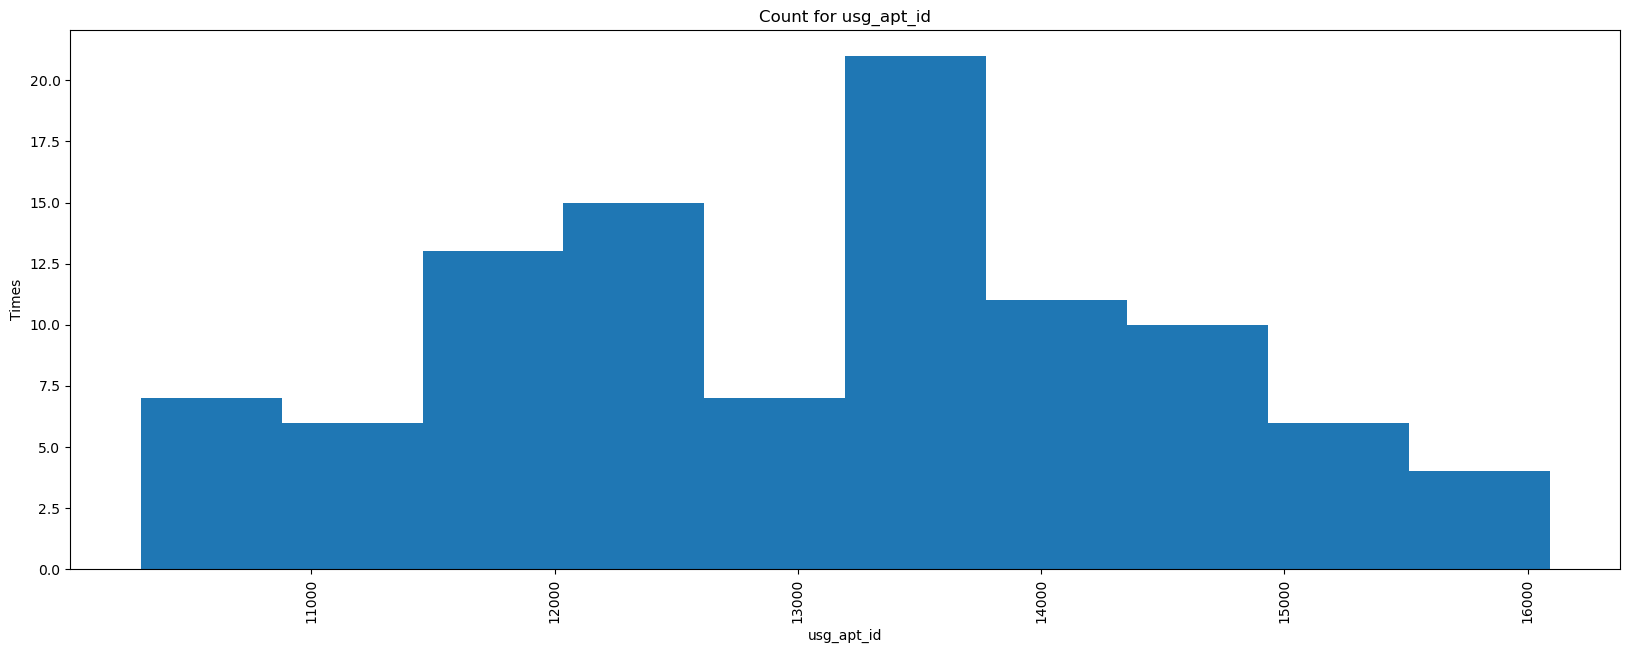

usg_apt
Write The Capital Letter for Chosen Chart Type(Line)L


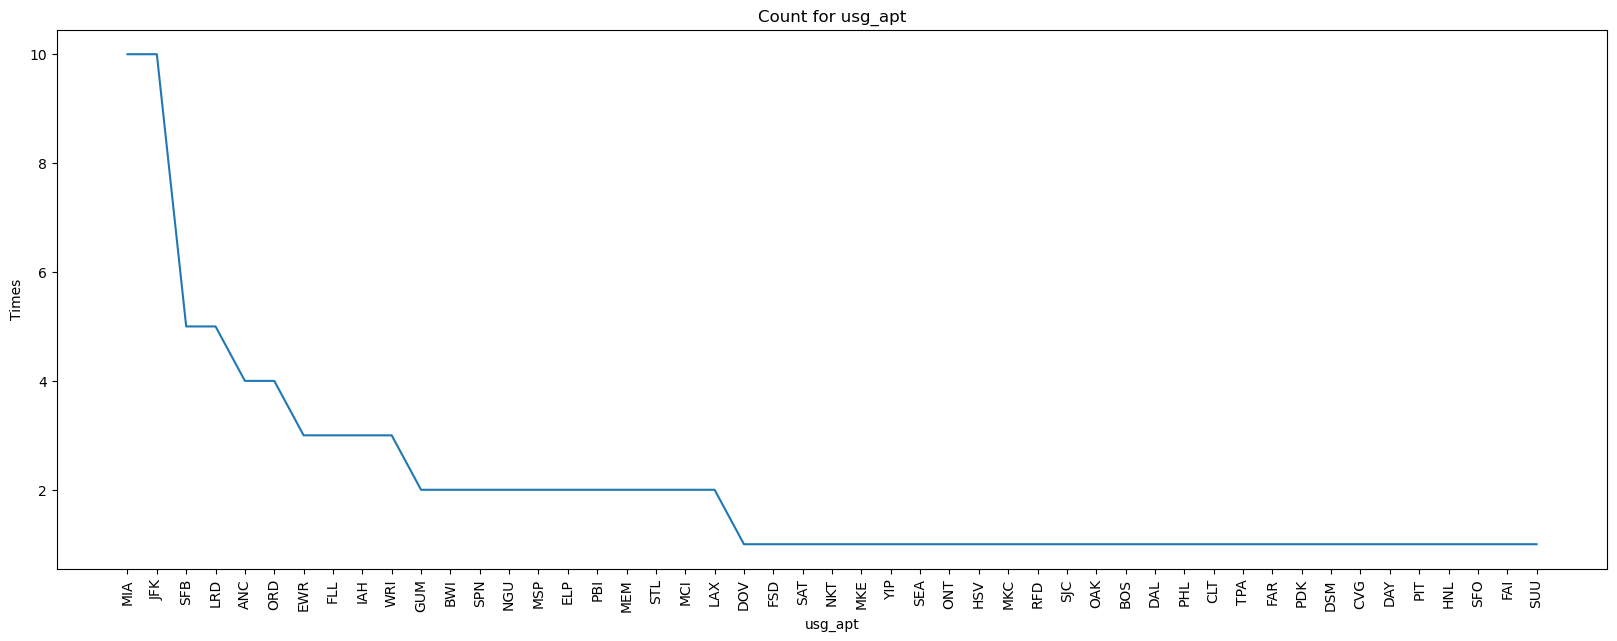

usg_wac
Write The Capital Letter for Chosen Chart Type(Histogram, Scatter, Pie)h


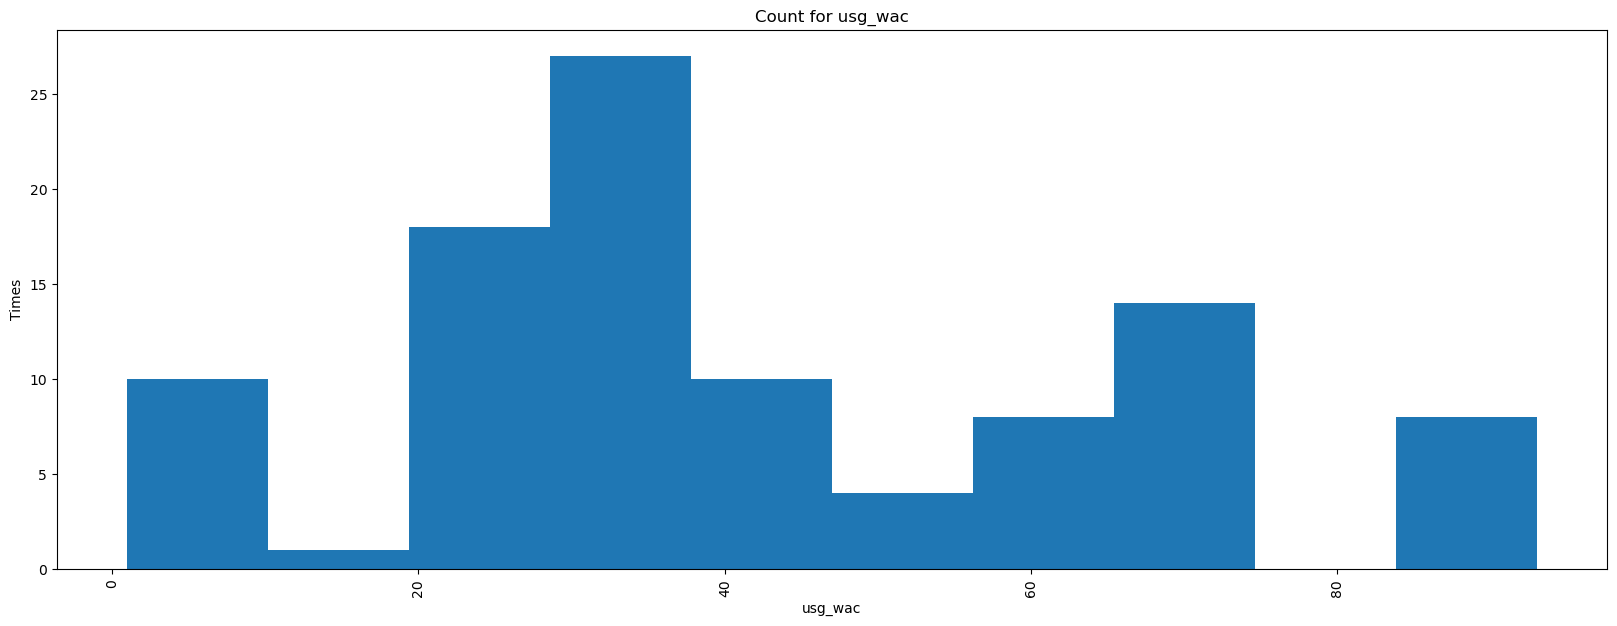

fg_apt_id
Write The Capital Letter for Chosen Chart Type(Histogram, Scatter, Pie)h


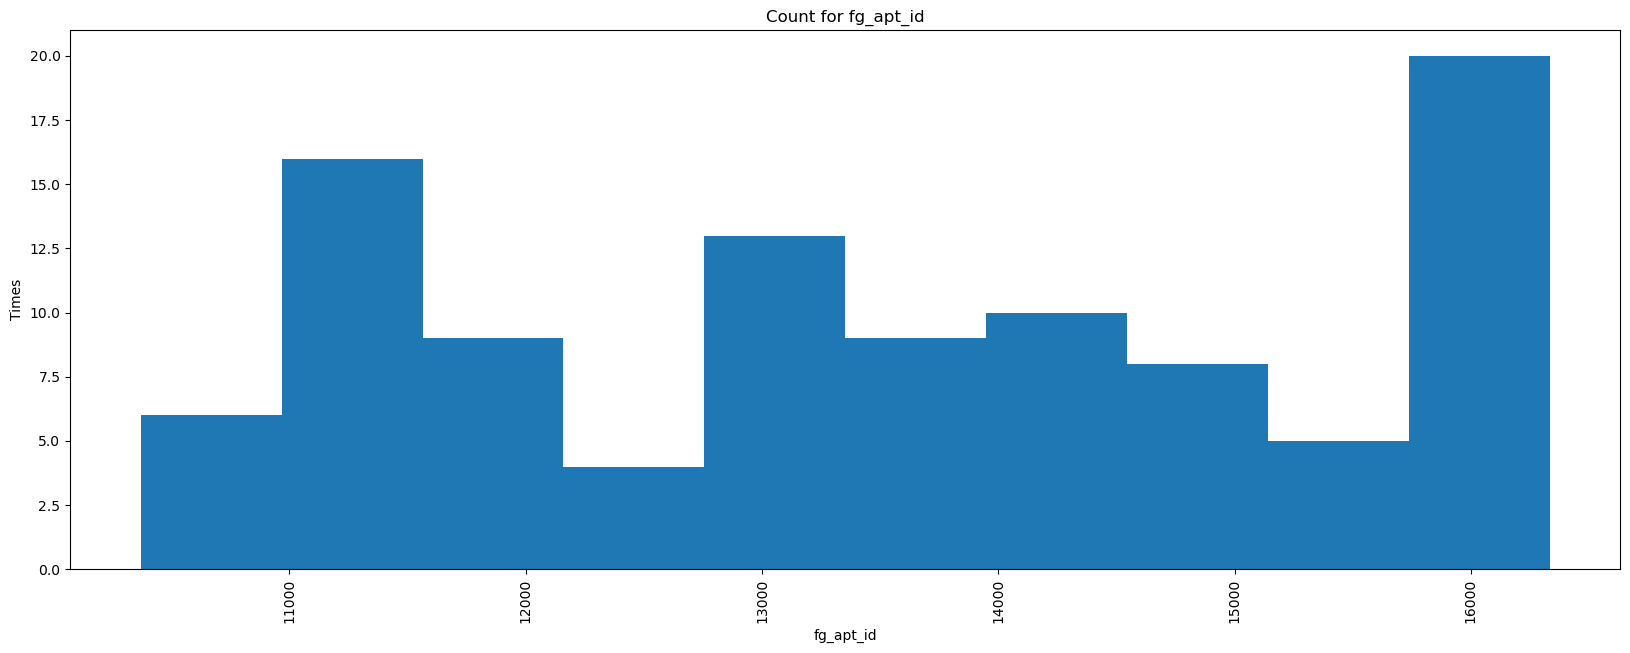

fg_apt
Write The Capital Letter for Chosen Chart Type(Line)L


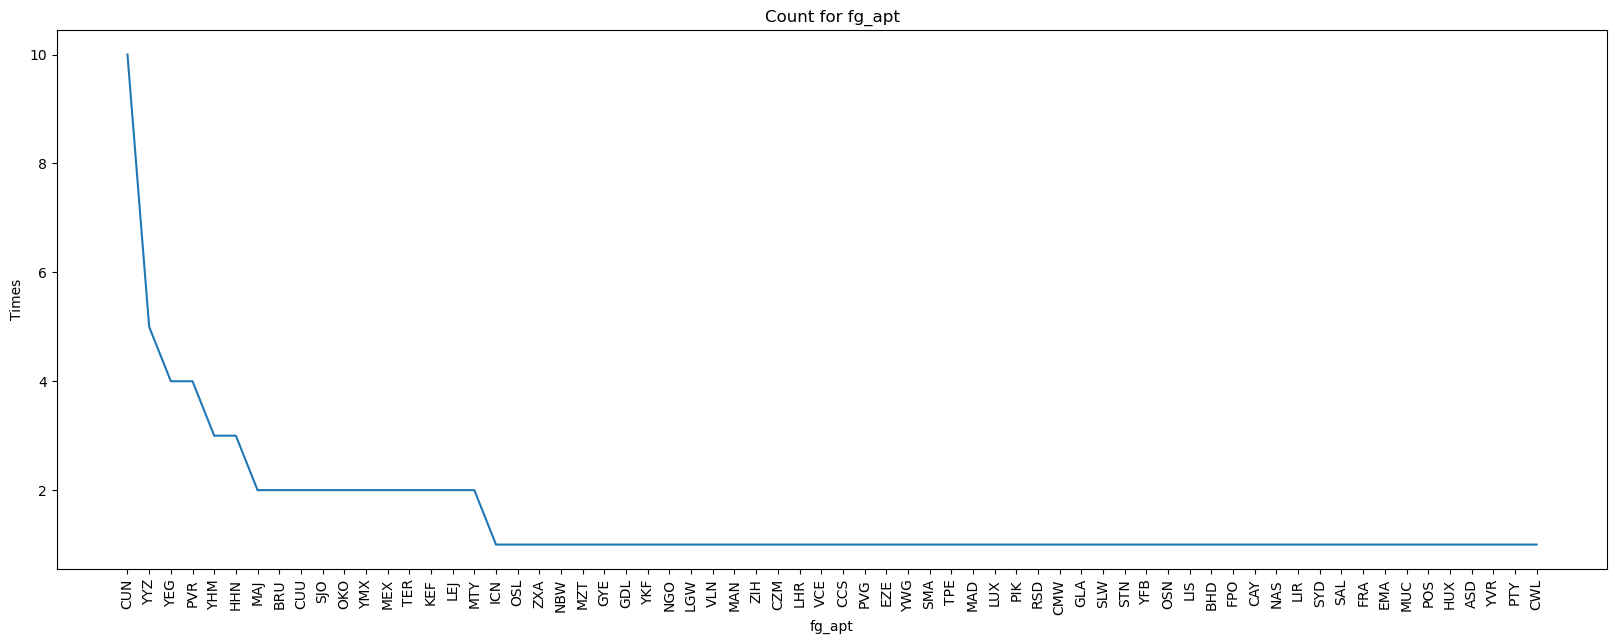

fg_wac
Write The Capital Letter for Chosen Chart Type(Histogram, Scatter, Pie)h


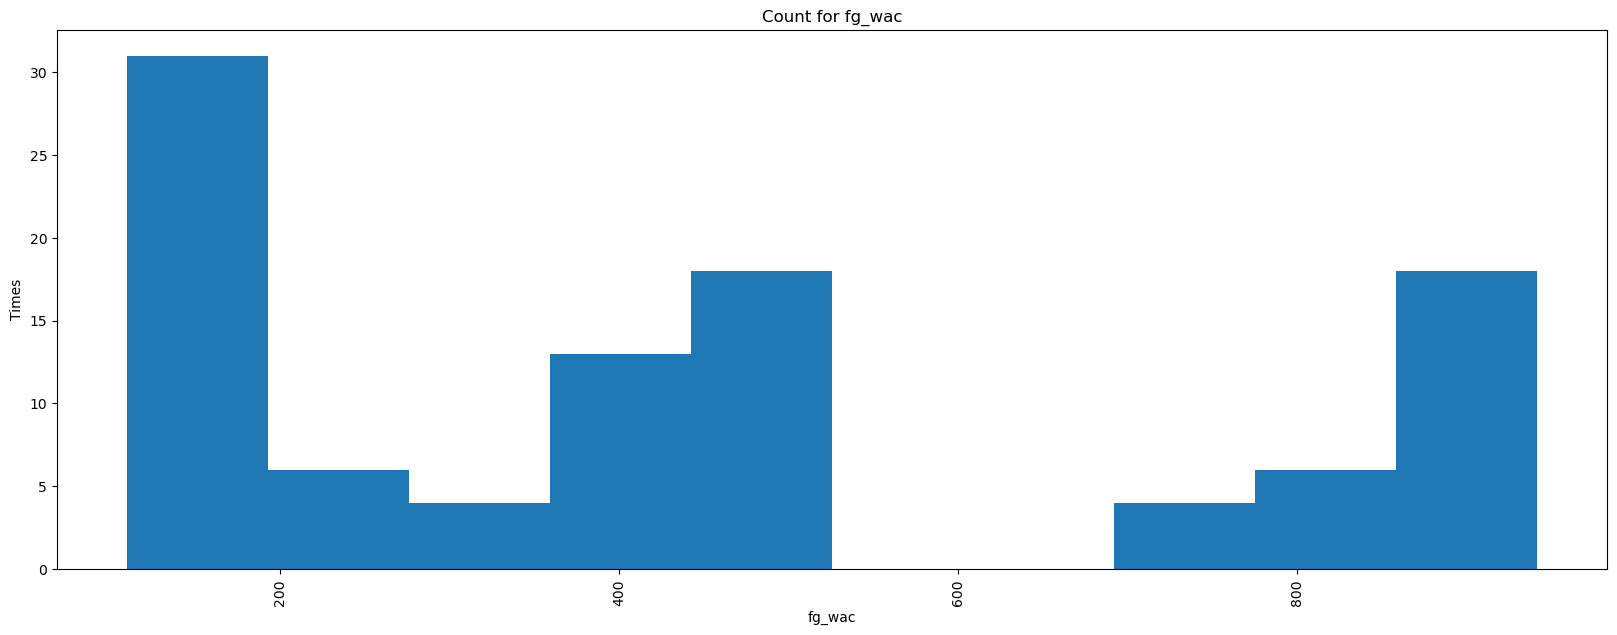

airlineid
Write The Capital Letter for Chosen Chart Type(Histogram, Scatter, Pie)h


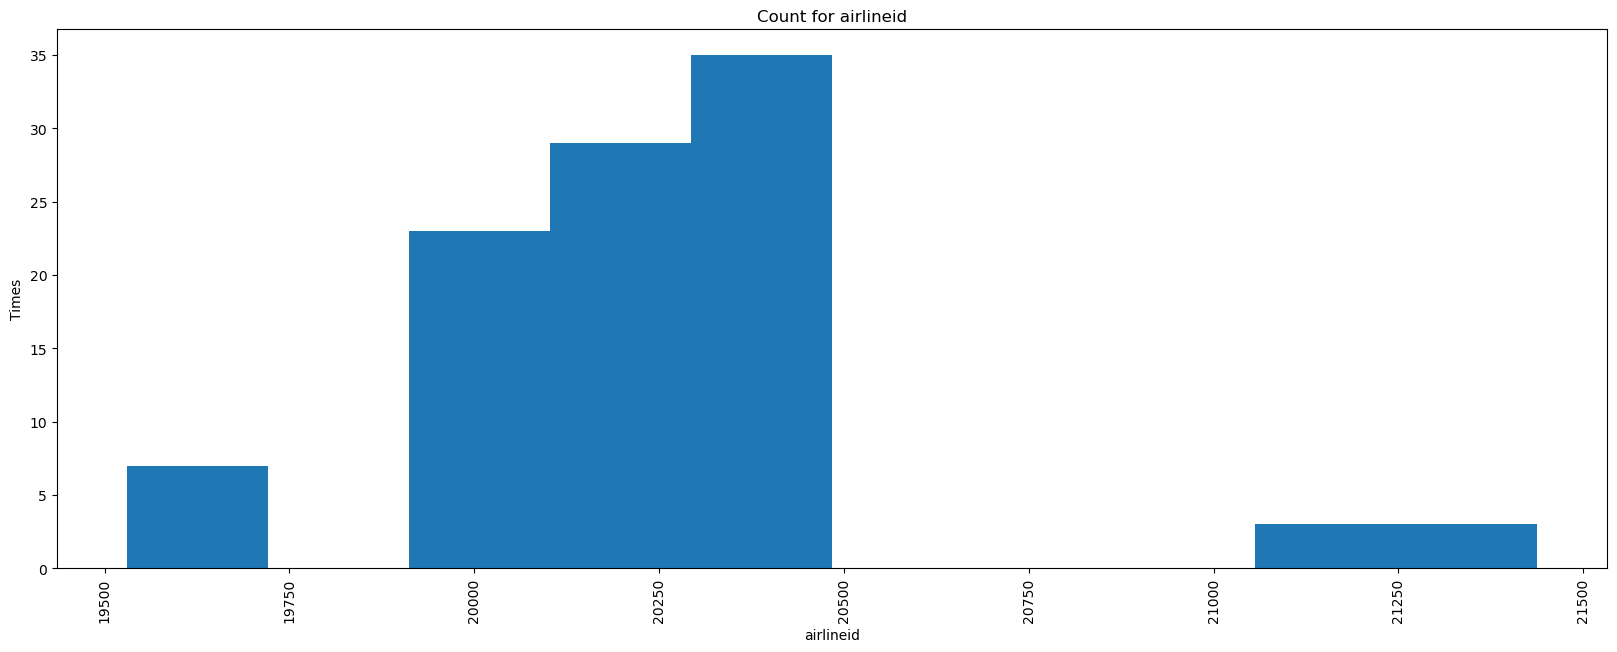

carrier
Write The Capital Letter for Chosen Chart Type(Line)L


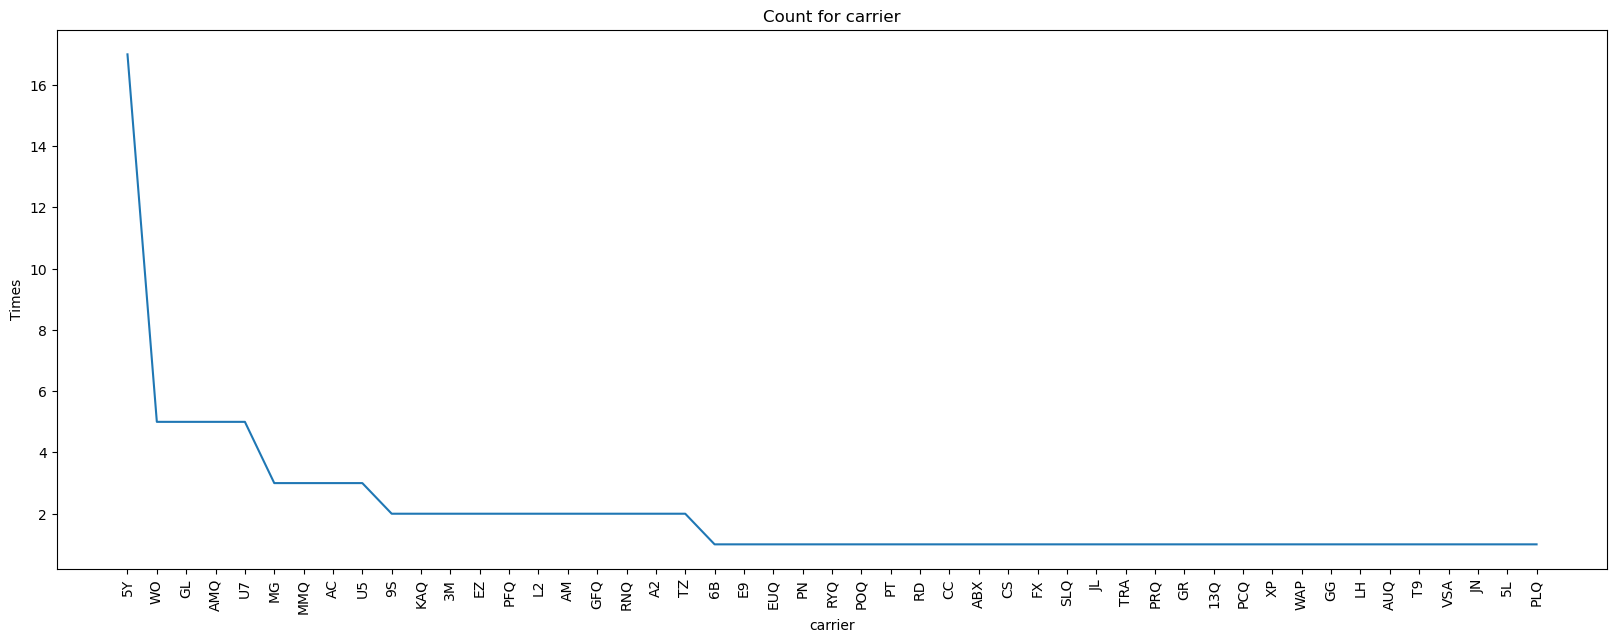

carriergroup
Write The Capital Letter for Chosen Chart Type(Line)L


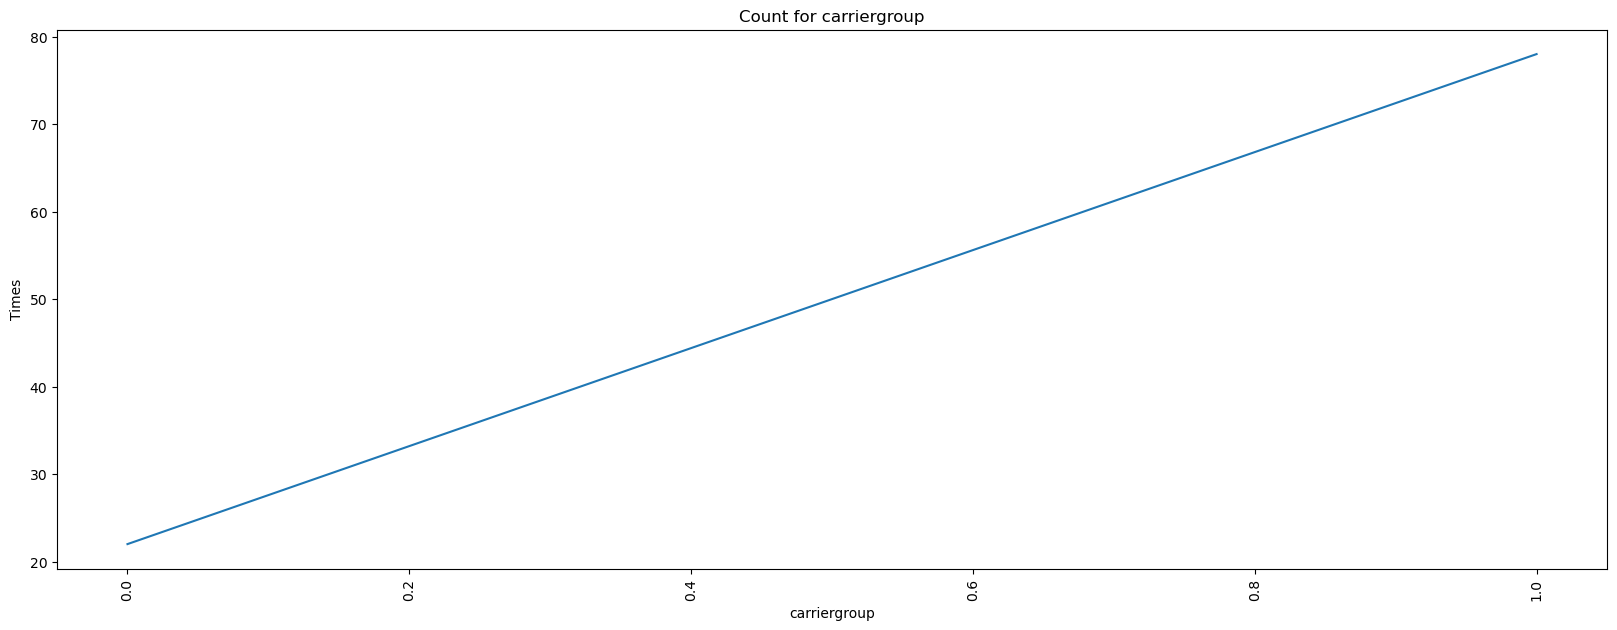

type
Write The Capital Letter for Chosen Chart Type(Line)L


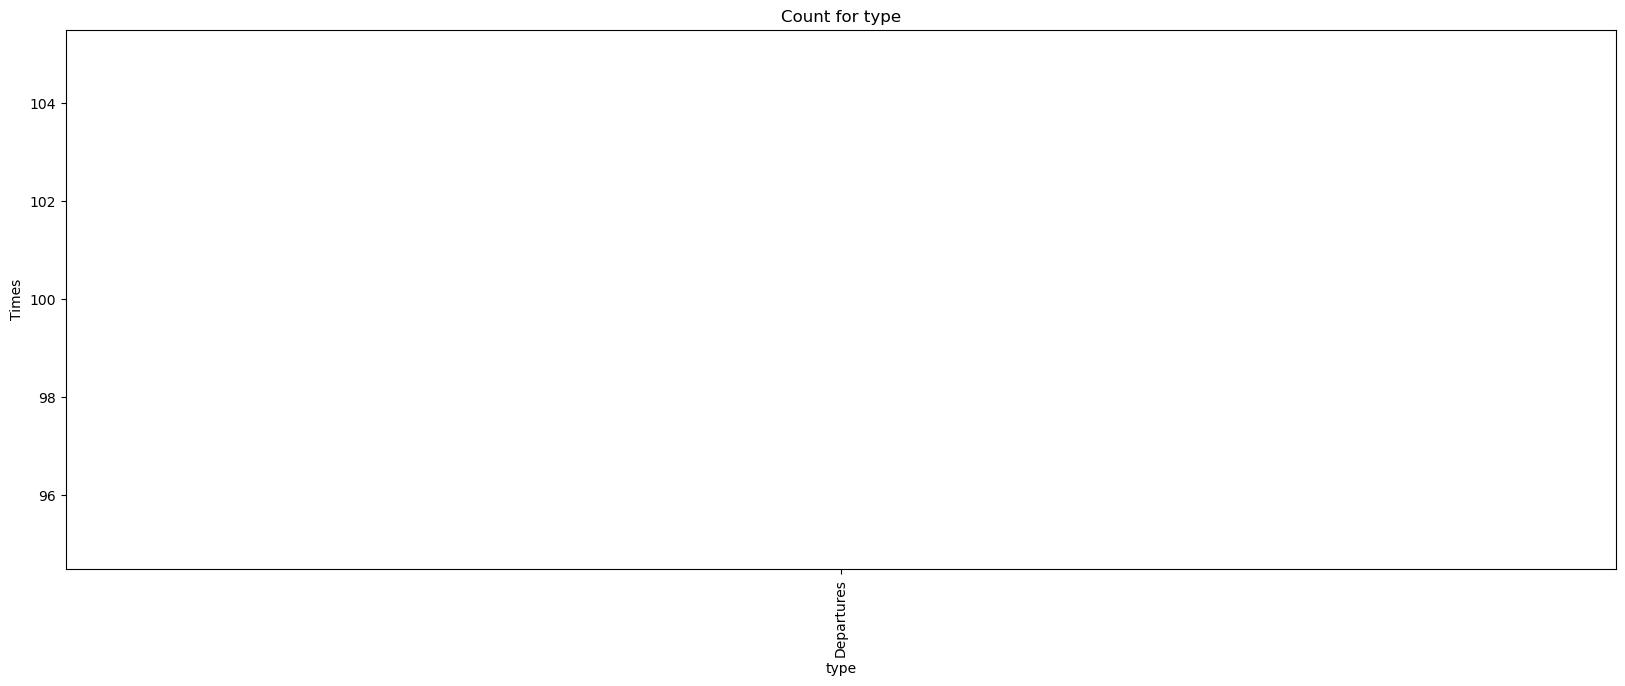

Scheduled
Write The Capital Letter for Chosen Chart Type(Line)L


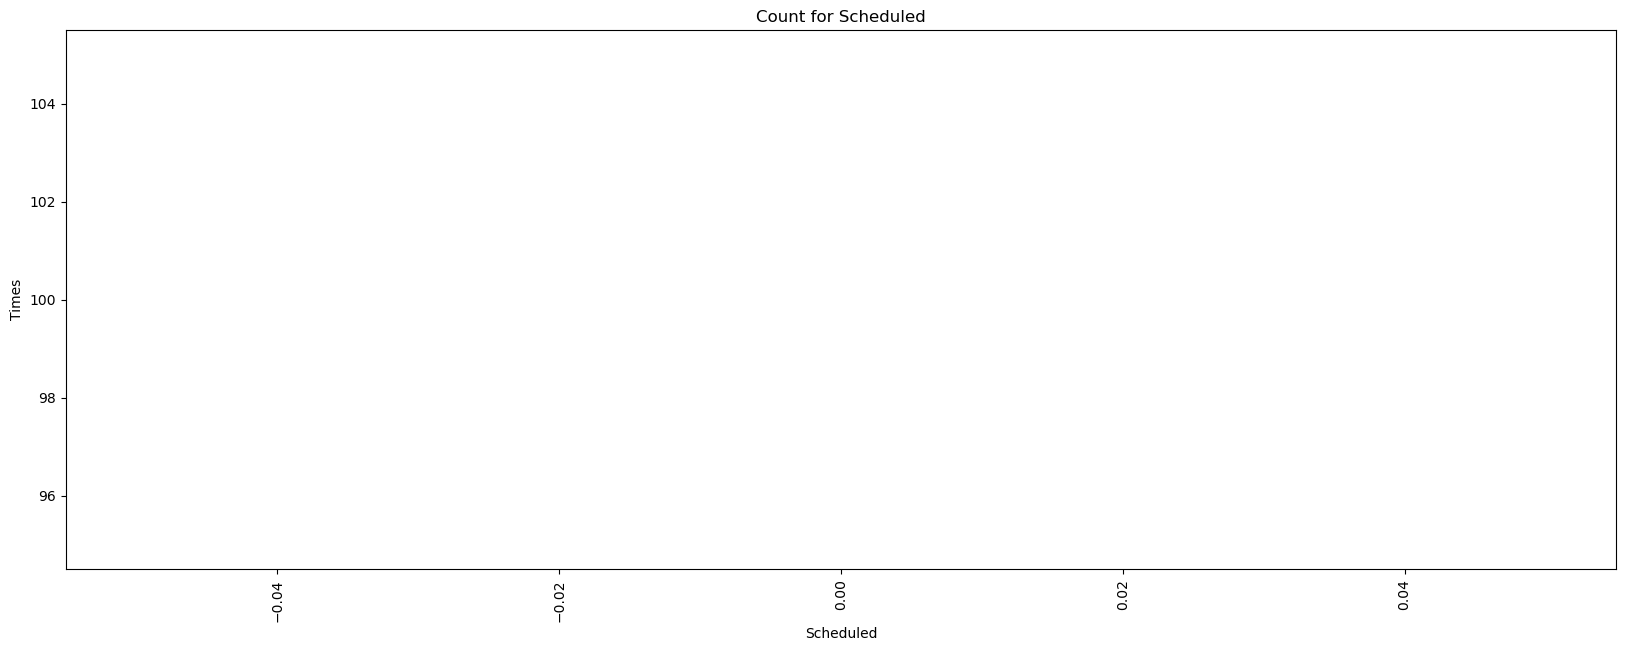

Charter
Write The Capital Letter for Chosen Chart Type(Histogram, Scatter, Pie)h


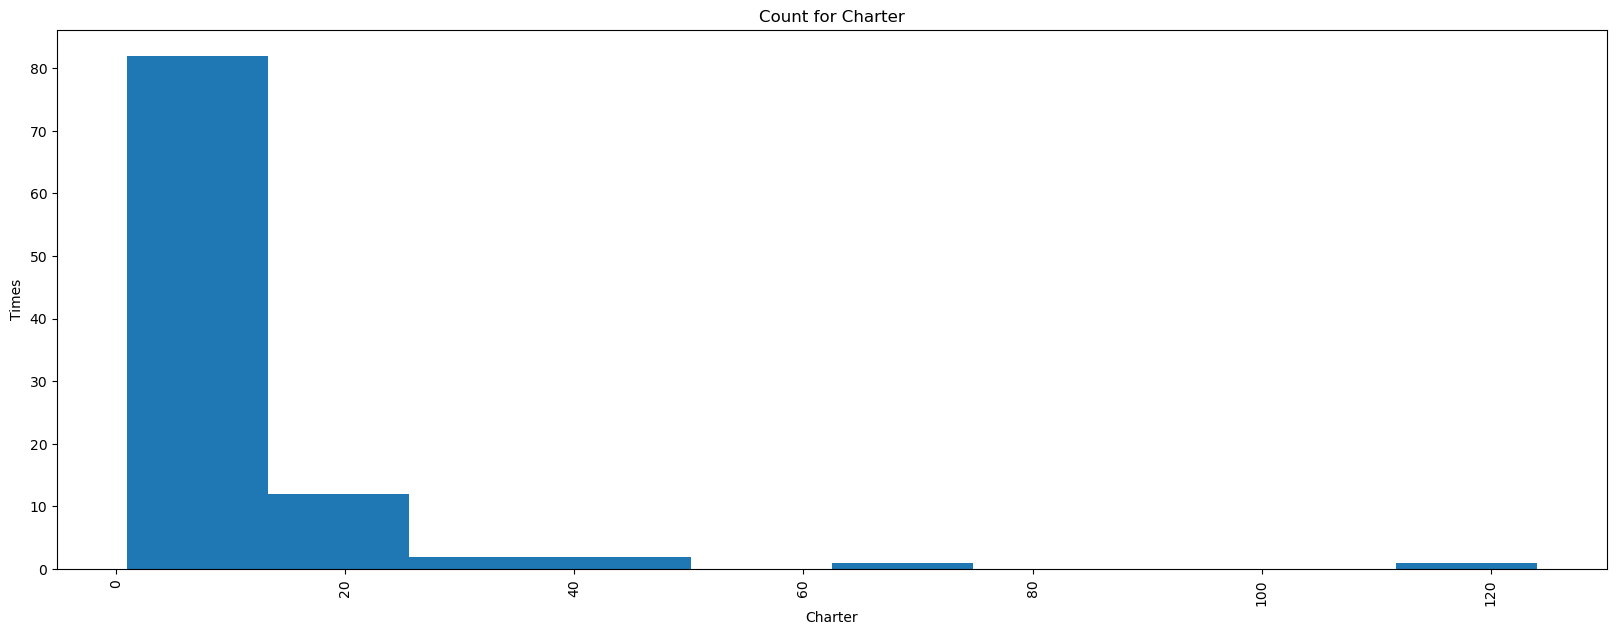

Total
Write The Capital Letter for Chosen Chart Type(Histogram, Scatter, Pie)h


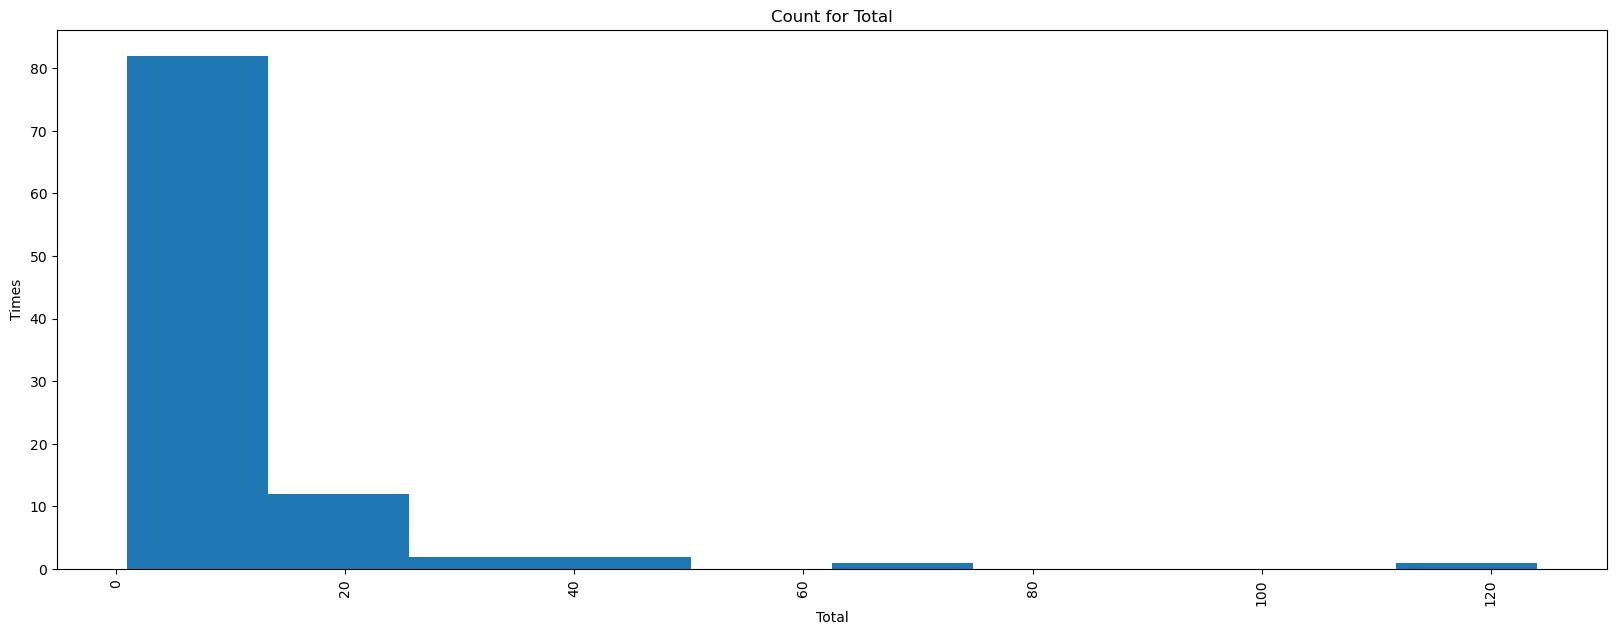

Do you want choose another data file (Y/N)? 
Another File


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tkinter import *
from tkinter import filedialog as fd
from tkinter.messagebox import showinfo

#Choose & Read the File
mainflag=True
while mainflag==True:
    df=None
    flag=False
    while flag==False:
        filetypes = (('csv files', '*.csv'),('Excel files', '*.xlsx'))
        filepath = fd.askopenfilename(title='Open files',initialdir='.',filetypes=filetypes)
        #showinfo(title='Selected Files',message=filepath)
        ad=filepath[filepath.find('.')+1:]
        if ad=='csv':
            #print('CSV File')
            df=pd.read_csv(filepath)
            flag=True
        elif ad=='xlsx':
            #print('Excel File')
            df=pd.read_excel(filepath)
            flag=True
        else:
            print('another type')
            flag=False

    #Get Type of Columns and Names
    df_column=[]
    for x in range(df.shape[1]):
        atype=df.dtypes[x]
        if 'i' in str(atype):
            column_type="int"
        elif 'f' in str(atype):
            column_type='float'
        elif 'o' in str(atype):
            column_type='string'
        column_name=df.columns[x]
        df_column.append([column_name,column_type])
    #print(df_column)

    #Clean Dublicated
    if df.duplicated().sum()==0:
        print('No duplicated Rows - No Need For Cleaning') 
    else:
        no_duplicated=df.duplicated().sum()
        df.drop_duplicates(inplace=True,keep='first')
        df.sort_index(ignore_index=True, inplace=True)
        print(no_duplicated,' Rows Have Been Removed')

    #Fill Nan Values
    for i in range(df.shape[1]):
        if len(df[df.columns[i]].mode()) >0:
            m=df[df.columns[i]].mode()[0]
        else:
            m=df[df.columns[i]].mode()

        #print(df[df.columns[i]].dtypes)


        if 'int'== df[df.columns[i]].dtypes:
            m_type=int(m)
        elif 'float' == df[df.columns[i]].dtypes:
            m_type=float(m)
        elif 'object' == df[df.columns[i]].dtypes:
            m_type=str(m)

        #print(m)
        df[df.columns[i]].fillna(value=m, inplace=True)

    #Charts
    small_sz=""
    while len(small_sz)==0:
        print('the size of data are ',df.shape[0],'rows and ', df.shape[1],'columns.')
        small_sz=input('\nProposal we can get sample from table(100 rows) [Y/N]')
    if small_sz.upper()=='Y':
        dfplt=df.head(100)
    else:
        dfplt=df
    for x in range(dfplt.shape[1]):
        if 'o' in str(dfplt.dtypes[x]):
            print(dfplt.columns[x])
            print('Write The Capital Letter for Chosen Chart Type(Line)L')
            plt.figure(figsize=(20,7))
            plt.plot(dfplt[dfplt.columns[x]].value_counts())
            plt.xlabel(str(dfplt.columns[x]))
            plt.ylabel('Times')
            plt.title('Count for '+str(dfplt.columns[x]))
            plt.xticks(rotation=90)
            plt.show()
        else:
            flag=True
            while (flag==True):
                print(dfplt.columns[x])
                reqflag=True
                while reqflag==True:
                    request= input('Write The Capital Letter for Chosen Chart Type(Histogram, Scatter, Pie)')
                    if len(request)>0:
                        request=request[0].upper()
                        reqflag=False
                        continue
                    else:
                        reqflag=True
                        continue

                if request=='H':
                    plt.figure(figsize=(20,7))
                    plt.hist(dfplt[dfplt.columns[x]])
                    plt.xlabel(str(dfplt.columns[x]))
                    plt.ylabel('Times')
                    plt.title('Count for '+str(dfplt.columns[x]))
                    plt.xticks(rotation=90)
                    plt.show()
                    flag=0
                    pass
                elif request=='S':
                    plt.figure(figsize=(20,7))
                    plt.scatter(dfplt[dfplt.columns[0]],dfplt[dfplt.columns[x]])
                    plt.ylabel(str(dfplt.columns[x]))
                    plt.xlabel(str(dfplt.columns[0]))
                    plt.title('Relation Between '+str(dfplt.columns[0])+" & "+str(dfplt.columns[x]))
                    plt.xticks(rotation=90)
                    plt.show()
                    flag=0
                    pass
                elif request=='P':
                    plt.figure(figsize=(20,20))
                    plt.pie(dfplt[dfplt.columns[x]],labels=dfplt[dfplt.columns[3]])
                    plt.title(str(dfplt.columns[x]))
                    plt.show()
                    flag=0
                    pass
                    flag=0
                    pass
                else:
                    flag=1
    if (input('Do you want choose another data file (Y/N)? ')).upper()!='Y':
        print('Good Bye')
        mainflag=False
    else:
        print('Another File')